# ANEOS MODEL INTERFACE JUPYTER NOTEBOOK

Sarah T. Stewart<br>
sts@ucdavis.edu<br>
Created October 22, 2019<br>
Updated January 21, 2020<p>

***
***
## COMMENTS ON ORIGINAL ANEOS IRON MODEL WITH HIGH-PRESSURE PHASE CHANGE
These material parameters for iron were distributed with the original ANEOS in Thompson 1970. The iron parameters were prepared by T.G. Trucano at Sandia according to documentation in the CTH shock code package.

This version was used in the giant impact papers using the GADGET2 code: Marcus et al. 2009, 2010ab; Cuk & Stewart 2012; Sarid et al. 2015; Lock & Stewart 2017; Lock et al. 2018; Rufu et al. 2017; Carter et al. 2018; Bonomo et al. 2019; Denman et al. submitted. This version of ANEOS iron was also used in many impact cratering studies, e.g.: Pierazzo et al. (1997); Svetsov (2005); Artemieva and Pierazza (2011); Barr and Citron (2011); Quintana et al. (2015); Yue and Di (2017); Moreau et al. (2018).

The parameters were tabulated in Thompson 1970 as "IRON 130KB PHASE TRANSITION" and in Thompson & Lauson 1972 as 'IRON 130PT'. This ANEOS model was used to construct SESAME table 2141 with the aid of the PANDA code. 

This is a condensed phase + vapor ANEOS model with ionization and a high-pressure phase transition for pure iron.

Issues:<br>
  - No melt curve.<br>
  - The model includes one high-pressure phase transition, but there are multiple solid phases. The high-pressure phase transition was never completed in ANEOS. It produces artificial discontinuities in the liquid field.<br>
  - The vapor curve does not match available data. The critical point temperature is too high.<br>
  - In the original ANEOS, the temperatures are too high and the entropies are too low in the liquid region. The discrepancy arises because the ANEOS model has a limiting 3nR heat capacity; the true heat capacities in liquid iron are larger.<br>

***
***
<b>STS ANEOS INTERFACE NOTEBOOK GUIDE</b>

<b>USAGE</b><br>
This notebook interacts with multiple outputs from the Stewart-modified version of ANEOS, including phase boundary information and tabulated EOS. 

This notebook is designed to be used in two modes:<br>
<ul>
<li> Development mode: ANEOS is called in the local directory to generate new model output. The user can varying the model input parameters and tabular gridding schemes. This notebook produces plots of the equation of state surface and comparisons to experimental data and ab initio calculations.
<li> Release mode: the notebook interacts with previously created ANEOS model output. This notebook provides detailed documentation of a version-controlled release of the model EOS and enables users to interact with the EOS surface and compare the model to data. 
</ul>

This notebook is distributed in release mode. Users who wish to use the development mode may request the modified version of ANEOS from the author.<p>

Development mode:<br>
The notebook calls a local aneos executable which expects a formatted ANEOS.INPUT ascii file and an ascii gridtable.txt definition file that is generated by this notebook. ANEOS produces an ANEOS.OUTPUT ascii file and gridded ascii SESAME-format EOS tables.<br>
The user edits (1) the input parameters in ANEOS.INPUT (separately from this notebook) and (2) the output EOS table parameters in the notebook cell below.<br>
This notebook reads some parameters from ANEOS.INPUT and assumes that the variables are spaced by 10 columns.<br> 
When the notebook is run, the code issues a system call to run the aneos program in the local directory and reads in results from the ANEOS.OUTPUT, NEW-SESAME-STD.TXT, and NEW-SESAME-EXT.TXT files to make the plots below and to generate the GADGET format EOS table and other miscellaneous files.<p>

Release mode:<br>
This notebook reads in the provided ANEOS.INPUT, EOS tables, and other distribution data to generate the plots below. <p>

<b>OUTPUT/PROVIDED DATA FILES</b><br>
ANEOS.OUTPUT: Plain text file with an overview of the calculated equation of state. Look at this file for any errors in the EOS calculation.<br>

NEW-SESAME-STD.TXT: Standard length Sandia-style SESAME file with 201 table and 301 table (density, temperature, pressure, sp. internal energy, Helmholtz free energy). 301 table units: g/cm$^3$, K, GPa, MJ/kg, MJ/kg. <br>

NEW-SESAME-EXT.TXT: SESAME-style table with extra variables from ANEOS. Contains the standard 201 table and non-standard 301-extra-variables EOS table. The 301 table has: density grid values, temperature grid values, sp. entropy(T,rho), sound speed(T,rho), sp. heat capacity(T,rho), KPA flag(T,rho). 2-D arrays list all densities, looping over each temperature. 301 table units: g/cm$^3$, K, MJ/K/kg, cm/s, MJ/K/kg, integer flag, integer flag. The KPA flag is an ANEOS output with phase information. <br>

NEW-SESAME-HUG.TXT: Ascii table with the reference state Hugoniot. <br>

NEW-SESAME-STD-NOTENSION.TXT: Standard length Sandia-style SESAME file with 201 table and 301 table (density, temperature, pressure, sp. internal energy, Helmholtz free energy) where the ANEOS tension region is removed and replaced with the solid-vapor coexistence region. 301 table units: g/cm$^3$, K, GPa, MJ/kg, MJ/kg. <br>

NEW-GADGET2-STD-NOTENSION.TXT: Standard GADGET2 EOS table generated by interpolating the ANEOS table with no tension. Format: number of density points, number of sp. entropy points, density grid values, sp. entropy grid values, 2-D arrays of pressure, temperature, specific internal energy, sound speed. 2-D array values list all densities, looping over each value for specific entropy. Units: g/cm$^3$, erg/K/g, dynes/cm$^2$, K, erg/g, cm/s. <br>

NEW-GADGET2-EXT-NOTENSION.TXT: Extended variables GADGET2 EOS table generated by interpolating the ANEOS table with no tension. Format: number of density points, number of sp. entropy points, density grid values, sp. entropy grid values, 2-D arrays of Helmholtz free energy, KPA flag, MDQ flag. 2-D array values list all densities, looping over each value for specific entropy. Units: g/cm$^3$, erg/K/g, erg/g, integer flag, integer flag. <br>

The SESAME tabular equation of state formats are described in Lyon and Johnson (1992).<p>

<b>ANEOS NOTES</b><br>
The ANEOS source code was provided by Jay Melosh and Gareth Collins. This version included Melosh's (2007) treatment for molecular gas and the capability to include a melt curve and solid-solid/liquid-liquid transition (Collins & Melosh LPSC 2014).<br>
In Stewart et al. 2019, the Melosh and Collins version of ANEOS was modified to adjust the Debye model for the thermal term in the Helmholtz free energy to approach a user-defined heat capacity at high temperatures. The multiplicative factor $f_{cv}$ is entered in input value V44, and the high-temperature heat capacity is $3f_{cv}Nk$.<p>
The ANEOSTEST.f routine was modified to output tabulated EOS. Note that the current version of this function sets positive pressures smaller than 1.E-30 GPa equal to 1.E-30 GPa.<br>
ANEOS2.f was modified to increase the number of points tabulated on the melt curve in the ANEOS.OUTPUT file and to gather the variables for the heat capacity modification.<br>
ANHUG.f was modified to output more Hugoniot points.<br>
ANEOS1.f and ANEOS2.f were modified to increase the high temperature limit for the heat capacity (Stewart et al., SCCM19).<p>

<b>CORRECTIONS AND IMPROVEMENTS</b><br>
Please send corrections to STS and any requests for data to include in the model-data comparison plots.<p>


In [1]:
# this cell has a java script that that enables hiding the raw python code

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
# Record the verions information for these calculation for posterity
import platform
print('python version: ',platform.python_version())
del platform
import matplotlib
print('matplotlib version: ', matplotlib.__version__)
del matplotlib
import numpy
print('numpy version: ', numpy.__version__)
del numpy
import scipy
print('scipy version: ', scipy.__version__)
del scipy
import pandas
print('pandas version: ', pandas.__version__)
del pandas

# this prevents some error messages for inline plotting in a jupyter notebook
%matplotlib inline 
# import python libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from copy import deepcopy
import numpy as np
from scipy import interpolate
import colormaps as local_cmaps
import subprocess
import pandas as pd
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
#
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams["patch.force_edgecolor"] = True

python version:  3.7.4
matplotlib version:  3.1.1
numpy version:  1.17.2
scipy version:  1.3.1
pandas version:  0.25.1


## USER INPUTS FOR SESAME AND GADGET2 TABLE CONSTRUCTION

If the code cell below is hidden, use the button above to reveal the cell.<p>

In development mode, the user must input:<br>
1. Header information for the SESAME table.<br>
2. Temperature, density and entropy grid points.<p>

The following code cell also includes the development mode flag and 
option to skip construction of a GADGET2 table if it is not needed.<p>

In [3]:
# -------------------------------------------------------------
# USER INPUTS
#-------------------------------------------------------------
# NOTEBOOK MODE
#-------------------------------------------------------------
#
DEVMODE = 1 # 1=development mode; 0=release mode
#
#-------------------------------------------------------------
# OPTIONS TO REMOVE TENSION REGION AND CONSTRUCT A GADGET2 TABLE
#-------------------------------------------------------------
#
REMOVETENSIONFLAG=0  # 0- keep tension region; 1- remove tension region
MAKEGADGETTABLE=0  # 1=make table; 0=do not make gadget2 table
#
#-------------------------------------------------------------
# USER MUST SET THESE VALUES TO DEFINE THE TABULATED EOS GRIDS
#-------------------------------------------------------------
#
# ====>>>>>> YOU NEED TO MAKE SURE THESE VALUES MATCH ANEOS.INPUT  <<<<=====
MODELNAME = 'Iron-ANEOS-SLVTv0.1Gx'
# Header information must all be compatible with float format
MATID = 1.0        # MATID number
DATE = 191022.     # Date as a single 6-digit number YYMMDD
VERSION = 0.1      # ANEOS Parameters Version number
FMN = 26.          # Formula weight in atomic numbers for Fe
FMW = 55.847       # Formula molecular weight (g/cm3) for Fe
# The following define the default initial state for material in the 201 table
R0REF   = 8.06     # g/cm3 *** R0REF is inserted into the density array; using gamma-iron for rho0
K0REF   = 1.33E12  # dynes/cm2; using gamma-iron for rho0
T0REF   = 298.     # K -- *** T0REF is inserted into the temperature array
P0REF   = 1.E6     # dynes/cm2 -- this defines the principal Hugoniot calculated below
#
# generate output files for other ANEOS models
modelflag = 2   # 0 - don't change anything above; 1 - Canup et al. 2013; 
                # 2 - GADGET2 Marcus PhD Thesis & Cuk & Stewart 2012; 3 - ISALE Dellen Collins and Melosh 2014
#
if modelflag == 1:
    MODELNAME = 'IRON WITH MELT CURVE'
    # Header information must all be compatible with float format
    MATID = 1.0        # MATID number
    DATE = 191022.     # Date as a single 6-digit number YYMMDD
    VERSION = 1.0      # ANEOS Parameters Version number
    FMN = 26.          # Formula weight in atomic numbers for Mg2SiO4
    FMW = 55.847       # Formula molecular weight (g/cm3) for Mg2SiO4
    # The following define the default initial state for material in the 201 table
    R0REF   = 7.85     # g/cm3 *** R0REF is inserted into the density array
    K0REF   = 1.45E12  # dynes/cm2  K0=rho0*cs0^2
    T0REF   = 298.     # K -- *** T0REF is inserted into the temperature array
    P0REF   = 1.E6     # dynes/cm2 -- this defines the principal Hugoniot calculated below
if modelflag == 2:
    MODELNAME = 'IRON 130PT Thompson 1970'
    # Header information must all be compatible with float format
    MATID = 1.0        # MATID number
    DATE = 191022.     # Date as a single 6-digit number YYMMDD
    VERSION = 1.0      # ANEOS Parameters Version number
    FMN = 26.          # Formula weight in atomic numbers for Mg2SiO4
    FMW = 55.847       # Formula molecular weight (g/cm3) for Mg2SiO4
    # The following define the default initial state for material in the 201 table
    R0REF   = 7.85     # g/cm3 *** R0REF is inserted into the density array
    K0REF   = 1.93E12  # dynes/cm2  K0=rho0*cs0^2
    T0REF   = 298.     # K -- *** T0REF is inserted into the temperature array
    P0REF   = 1.E6     # dynes/cm2 -- this defines the principal Hugoniot calculated below
#
#-------------------------------------------------------------
# EXAMPLE EOS GRID ARRAYS
#-------------------------------------------------------------
#
# Life is easier if the grid arrays are even in length (after adding T0REF and R0REF below)
#
# Flag for easily switching between different table grids during model development
# 1: high res for testing
gridflag = 1
#
#------------------------------------------------------
if gridflag == 0: # low resolution grid
    # define the temperature array for the SESAME table
    # 0 K is changed to 1 K
    # T0REF is inserted into the table if it is not present in the original array
    # need to have extra temperature resolution around the triple point
    gridtvals  = [0, 1750, 1950, 20000.,1.E5, 1.E7] # K -- this array defines the edges of the segments along the grid, 0 is changed to 1 below
    gridtstyle = [1,1,1,1,0] # 1 for linear, 0 for log in each segment
    gridtnpts  = [20, 20, 150.,50.,10.] # number of grid points in each segment
    # define the density array for the SESAME AND GADGET2 tables
    # R0REF is inserted into the table if it is not present in the original array
    # need to have extra density resolution around the triple point
    # 0 g/cm3 is removed if present
    gridrvals  = [1.e-20, 0.5, 6.6, 7.4, 20., 30.] # g/cm3 -- this array defines the edges of the segments along the grid
    gridrstyle = [0, 1, 1, 1, 1] # 1 for linear, 0 for log in each segment
    gridrnpts  = [50, 20, 20, 40, 20] # number of grid points in each segment
    # define the specific entropy array for the GADGET2 table
    # 0 MJ/K/kg is removed if present
    gridsvals  = [1.e-4,.1] # MJ/K/kg -- this array defines the edges of the segments along the grid
    gridsstyle = [0] # 1 for linear, 0 for log in each segment
    gridsnpts  = [200] # number of grid points in each segment
#
if gridflag == 1: # new form for the high resolution table entries in 301 table. Try for 1e6 values
    # define the temperature array for the SESAME table
    # 0 K is changed to 1 K
    # T0REF is inserted into the table if it is not present in the original array
    # need to have extra temperature resolution around the triple point
    gridtvals  = [0, 100, 1750, 1950, 20000.,1.E5, 1.E7] # K -- this array defines the edges of the segments along the grid, 0 is changed to 1 below
    gridtstyle = [1,1,1,1,1,0] # 1 for linear, 0 for log in each segment
    gridtnpts  = [2, 75., 100, 500.,85.,50.] # number of grid points in each segment
    # define the density array for the SESAME AND GADGET2 tables
    # R0REF is inserted into the table if it is not present in the original array
    # need to have extra density resolution around the triple point
    # 0 g/cm3 is removed if present
    gridrvals  = [1.e-20, 0.5, 6.6, 7.4, 20., 30.] # g/cm3 -- this array defines the edges of the segments along the grid
    gridrstyle = [0, 1, 1, 1, 1] # 1 for linear, 0 for log in each segment
    gridrnpts  = [150, 84, 101, 400, 100] # number of grid points in each segment
    # define the specific entropy array for the GADGET2 table
    # 0 MJ/K/kg is removed if present
    gridsvals  = [1.e-4,.1] # MJ/K/kg -- this array defines the edges of the segments along the grid
    gridsstyle = [0] # 1 for linear, 0 for log in each segment
    gridsnpts  = [800] # number of grid points in each segment
#----------------------------------------
# END USER INPUT
#----------------------------------------

In [4]:
# THIS CELL DEFINEs FUNCTIONS 
# define index function (must be a more efficient way to do this...)
get_indexes = lambda x, xs: [i for (y, i) in zip(xs, range(len(xs))) if x == y]
#
# LOAD EXTERNAL FUNCTIONS AND OBJECT CLASSES
# defines rational function interpolation functions rf1d and rf2d
#%run rfinterpolation.py 
# defines class objects for extEOStable and functions to read in ANEOS input and output
# READ THIS CODE IF YOU WANT TO UNDERSTAND THE FILE STRUCTURES
%run eostable.py
#import eostable
# Run the following help for the functions in the class
#help(extEOStable())

In [5]:
# THIS CELL HAS CODE TO GENERATE THE GRIDS AND WRITES TO A FILE TO BE READ BY ANEOS
print('GENERATING ARRAYS FOR THE INDICES OF THE TABULATED EOS.')
#-------------- the following code generates the temperature array
gridtarr = []
for iir in  range(1,len(gridtvals)):
    if gridtstyle[iir-1] == 1:
        # linear region
        temptarr = np.arange(gridtnpts[iir-1])/gridtnpts[iir-1]*(gridtvals[iir]-gridtvals[iir-1])+gridtvals[iir-1]
    if gridtstyle[iir-1] == 0:
        # log region
        logstep = (np.log10(gridtvals[iir])-np.log10(gridtvals[iir-1]))/gridtnpts[iir-1]
        temptarr = np.power(10.,np.log10(gridtvals[iir-1])+(np.arange(gridtnpts[iir-1]))*logstep)
    gridtarr = np.concatenate((gridtarr,temptarr))
# check if T0REF already in the grid
#indexT0REF = get_indexes(T0REF,gridtarr)
indexT0REF = np.where(abs(T0REF-gridtarr)<1.E-4)[0]
if len(indexT0REF) == 0:
    # insert T0REF K into the array
    indexT0REF = np.where((gridtarr-T0REF)>0.)[0]
    gridtarr = np.concatenate((gridtarr[0:indexT0REF[0]],[T0REF],gridtarr[indexT0REF[0]::]))
    if indexT0REF[0]>1:
        print('Inserted the REFERENCE TEMPERATURE INTO THE ARRAY:',gridtarr[indexT0REF[0]-2:indexT0REF[0]+3])
    else:
        print('Inserted the REFERENCE TEMPERATURE INTO THE ARRAY:',gridtarr[indexT0REF[0]-1:indexT0REF[0]+3])
else:
    print('T0REF already in temperature array: ',T0REF,gridtarr[indexT0REF[0]-2:indexT0REF[0]+2])
# Remove 0 K or convert to 1 K
indexzero = get_indexes(0.,gridtarr)
indexone = get_indexes(1.,gridtarr)
if len(indexzero) == 1 and len(indexone) == 0:
    gridtarr[indexzero] = 1.
    print('Zero kelvin changed to 1 kelvin.')
else:
    gridtarr = np.delete(gridtarr, indexzero)
    print('Deleted zero K index.')
#
#gridtsize = len(grdtarr)
print('Number of temperature points: ',len(gridtarr))
#print(gridtarr)
#------------ the following code generates the density array
gridrarr = []
for iir in range(1,len(gridrvals)):
    if gridrstyle[iir-1] == 1:
        # linear region
        temprarr = np.arange(gridrnpts[iir-1])/gridrnpts[iir-1]*(gridrvals[iir]-gridrvals[iir-1])+gridrvals[iir-1]
    if gridrstyle[iir-1] == 0:
        # log region
        logstep = (np.log10(gridrvals[iir])-np.log10(gridrvals[iir-1]))/gridrnpts[iir-1]
        temprarr = np.power(10.,np.log10(gridrvals[iir-1])+(np.arange(gridrnpts[iir-1]))*logstep)
    gridrarr = np.concatenate((gridrarr,temprarr))
# check if R0REF already in the grid
#indexR0REF = get_indexes(R0REF,gridrarr)
indexR0REF = np.where(abs(R0REF-gridrarr)<1.E-4)[0]
if len(indexR0REF) == 0:
    # insert R0REF  into the array
    indexR0REF = np.where((gridrarr-R0REF)>0.)[0]
    gridrarr = np.concatenate((gridrarr[0:indexR0REF[0]],[R0REF],gridrarr[indexR0REF[0]::]))
    print('Inserted the REFERENCE DENSITY INTO THE ARRAY:',gridrarr[indexR0REF[0]-2:indexR0REF[0]+3])
    #print('NOT INSERTING REFERENCE DENSITY INTO THE ARRAY.')
else:
    print('R0REF already in density array: ',R0REF,gridrarr[indexR0REF[0]-2:indexR0REF[0]+2])
# Remove 0 g/cm3 if present
indexzero = get_indexes(0.,gridrarr)
if len(indexzero) == 1:
    gridrarr = np.delete(gridrarr, indexzero)
    print('Deleted zero g/cm3 index.')
#
#gridrsize = len(gridrarr)
print('Number of density points: ',len(gridrarr))
#print(gridrarr)
#------------ the following code generates the specific entropy array for gadget tables
gridsarr = []
for iir in range(1,len(gridsvals)):
    if gridsstyle[iir-1] == 1:
        # linear region
        tempsarr = np.arange(gridsnpts[iir-1])/gridsnpts[iir-1]*(gridsvals[iir]-gridsvals[iir-1])+gridsvals[iir-1]
    if gridsstyle[iir-1] == 0:
        # log region
        logstep = (np.log10(gridsvals[iir])-np.log10(gridsvals[iir-1]))/gridsnpts[iir-1]
        tempsarr = np.power(10.,np.log10(gridsvals[iir-1])+(np.arange(gridsnpts[iir-1]))*logstep)
    gridsarr = np.concatenate((gridsarr,tempsarr))
# Remove 0 MJ/K/kg if present
indexzero = get_indexes(0.,gridsarr)
if len(indexzero) == 1:
    gridsarr[indexzero]=1.e-20
#    gridsarr = np.delete(gridsarr, indexzero)
    print('replaced zero MJ/K/kg index with 1.E-20')
#gridssize = len(gridsarr)
#
print('Number of specific entropy points: ',len(gridsarr))
#print(gridsarr)

print('Number of words in the standard SESAME 301 table (NR, NT, R, T, P, IE, HFE)=',2.+len(gridrarr)+len(gridtarr)+len(gridrarr)*len(gridtarr)*3.)
#-----------------------------------------------------------
#
if DEVMODE:
    print('WRITING tablegrid.txt FOR ANEOS in the local directory.\n')
    # write the table arrays to a file for the ANEOS driver to read in
    tablegridfile = open("tablegrid.txt","w")  
    tablegridfile.write("{:.6e}".format(MATID)+'\n')  
    tablegridfile.write("{:.6e}".format(DATE)+'\n')  
    tablegridfile.write("{:.6e}".format(VERSION)+'\n')  
    tablegridfile.write("{:.6e}".format(FMN)+'\n')  
    tablegridfile.write("{:.6e}".format(FMW)+'\n')  
    tablegridfile.write("{:.6e}".format(R0REF)+'\n')  
    tablegridfile.write("{:.6e}".format(K0REF)+'\n')  
    tablegridfile.write("{:.6e}".format(T0REF)+'\n')  
    tablegridfile.write("{:.6e}".format(len(gridrarr))+'\n')  # number of density points
    tablegridfile.write("{:.6e}".format(len(gridtarr))+'\n')  # number of temperature points
    for i in range(0,len(gridrarr)):
        tablegridfile.write("{:.6e}".format(gridrarr[i])+'\n')
    for i in range(0,len(gridtarr)):
        tablegridfile.write("{:.6e}".format(gridtarr[i])+'\n')
    tablegridfile.close()
#
#-----------------------------------------------------
# Output GADGET2 Table information
if MAKEGADGETTABLE:
    print('Number of words in the extended GADGET2 EOS table (NR, NS, R, S, P, T, IE, CS, HFE, CV, KPA, MDQ)=',2.+len(gridrarr)+len(gridtarr)+len(gridrarr)*len(gridtarr)*8.)
#------------------------------------------------------

#----------------------------------------------------
# Sp. Internal Energy grid for Tillotson
tillearr = np.power(10.,np.arange(600)/600.*6.-3.) # MJ/kg
tillearr = np.append(0.,tillearr)
print('Number of specific internal energy points for Tillotson EOS: ',len(tillearr))
#----------------------------------------------------
# Paranoia check
# make sure all table grid values are unique
if (len(np.unique(gridtarr))!=len(gridtarr)):
    print('NON-UNIQUE VALUES IN TEMP ARRAY')
    stopthecode
if (len(np.unique(gridrarr))!=len(gridrarr)):
    print('NON-UNIQUE VALUES IN DENSITY ARRAY')
    stopthecode
if (len(np.unique(gridsarr))!=len(gridsarr)):
    print('NON-UNIQUE VALUES IN SP. ENTROPY ARRAY')
    stopthecode
if (len(np.unique(tillearr))!=len(tillearr)):
    print('NON-UNIQUE VALUES IN SP. ENERGY ARRAY')
    stopthecode

#----------------------------------------------------

print('\nDone generating EOS grids.\n')
print('\nCHECK THAT THE GRID ARRAYS ARE EVEN IN LENGTH.\n')

# END TABLE GRIDDING INFORMATION

GENERATING ARRAYS FOR THE INDICES OF THE TABULATED EOS.
T0REF already in temperature array:  298.0 [254. 276. 298. 320.]
Zero kelvin changed to 1 kelvin.
Number of temperature points:  812
Inserted the REFERENCE DENSITY INTO THE ARRAY: [7.8095 7.841  7.85   7.8725 7.904 ]
Number of density points:  836
Number of specific entropy points:  800
Number of words in the standard SESAME 301 table (NR, NT, R, T, P, IE, HFE)= 2038146.0
WRITING tablegrid.txt FOR ANEOS in the local directory.

Number of specific internal energy points for Tillotson EOS:  601

Done generating EOS grids.


CHECK THAT THE GRID ARRAYS ARE EVEN IN LENGTH.



In [6]:
if DEVMODE:
    # call aneos in the local directory
    # output file is in the local directory
    print('RUNNING IN DEVELOPMENT MODE')
    print('Calling aneos in the local directory.')
    completed = subprocess.run(['./aneos'])
    print('Aneos call complete. CHECK THAT A NEW ANEOS.OUTPUT FILE WAS CREATED.')
    print('aneos call result: ', completed.returncode)
    print('Check ANEOS.OUTPUT file for errors.')
else:
    print('RUNNING IN RELEASE MODE: NO ANEOS SYSTEM CALL.')
    print('READING IN EOS DISTRIBUTION FILES.')

RUNNING IN DEVELOPMENT MODE
Calling aneos in the local directory.
Aneos call complete. CHECK THAT A NEW ANEOS.OUTPUT FILE WAS CREATED.
aneos call result:  0
Check ANEOS.OUTPUT file for errors.


In [7]:
# READ IN NEW ANEOS MODEL and fill the extEOStable class object
# source in eostable.py
#------------------------------------------------------------------
NewEOS  = extEOStable() # FIRST make new empty EOS object
NewEOS.loadextsesame('NEW-SESAME-EXT.TXT') # LOAD THE EXTENDED 301 SESAME FILE GENERATED BY STSM VERSION OF ANEOS
NewEOS.loadstdsesame('NEW-SESAME-STD.TXT') # LOAD THE STANDARD 301 SESAME FILE GENERATED BY STSM VERSION OF ANEOS
NewEOS.MODELNAME = MODELNAME # string set above in user input
NewEOS.MDQ = np.zeros((NewEOS.NT,NewEOS.ND)) # makes the empty MDQ array
#print(NewEOS.units) # these are the default units for SESAME rho-T tables
#'Units: g/cm3, K, GPa, MJ/kg, MJ/kg, MJ/K/kg, cm/s, MJ/K/kg, KPA flag. 2D arrays are (NT,ND).'

# Add the header info to the table. This could be done during the loading. 
# if made from this notebook, these values are set in the user-input above.
# ** MAKE SURE THEY MATCH ANEOS.INPUT **
NewEOS.MATID   = MATID
NewEOS.DATE    = DATE
NewEOS.VERSION = VERSION
NewEOS.FMN     = FMN
NewEOS.FMW     = FMW
NewEOS.R0REF   = R0REF
NewEOS.K0REF   = K0REF
NewEOS.T0REF   = T0REF
NewEOS.P0REF   = P0REF
#
# Load the information from ANEOS.INPUT and ANEOS.OUTPUT
NewEOS.loadaneos(aneosinfname='ANEOS.INPUT',aneosoutfname='ANEOS.OUTPUT')
#
# calculate the principal Hugoniot from the table
if DEVMODE:
    # calculate the Hugoniot and write to a file
    NewEOS.calchugoniot(r0=NewEOS.R0REF,t0=NewEOS.T0REF,writefilename='NEW-SESAME-HUG.TXT')
else:
    # just calculate the Hugoniot and put it in the EOS object
    NewEOS.calchugoniot(r0=NewEOS.R0REF,t0=NewEOS.T0REF)
#
# calculate the 1-bar profile; loop over temp
NewEOS.onebar.T = np.zeros(NewEOS.NT)
NewEOS.onebar.S = np.zeros(NewEOS.NT)
NewEOS.onebar.rho = np.zeros(NewEOS.NT)
it0 = np.where(NewEOS.T >= NewEOS.T0REF)[0]
id0 = np.arange(NewEOS.ND)#np.where(NewEOS.rho >= 0.8*NewEOS.R0REF)[0]
for iit in range(0,NewEOS.NT):
    NewEOS.onebar.T[iit] = NewEOS.T[iit]
    NewEOS.onebar.S[iit] = np.interp(1.E-4,NewEOS.P[iit,id0],NewEOS.S[iit,id0])
    NewEOS.onebar.rho[iit] = np.interp(1.E-4,NewEOS.P[iit,id0],NewEOS.rho[id0])
    #print(iit,NewEOS.onebar.rho[iit],NewEOS.onebar.T[iit],NewEOS.onebar.S[iit]*1.E3)


Done loading ANEOS files.
ANEOS WAS CALLED WITH THE FOLLOWING INPUT, LOADED FROM FILE  ANEOS.INPUT
 *ANEOS INPUT FILE FOR STSM JUPYTER NOTEBOOK. VARIABLES MUST BE SPACED BY 10 CHARACTERS.
 *         EOS#      string for EOS name           .....Hugoniot initial........ long
 *                                                 T(eV)           Rho(g/cc)     flag
 ANEOS1    -1        'IRON 130PT Thompson 1970'    THUG=-1         RHUG=-1

 *
 *         nelem     type      rho0      temp0(K)  press0    B0/-Cbulk Gamma0    Tdebye(K)
 *         V01       V02       V03       V04       V05       V06       V07       V08
 ANEOS2    1         4         7.85      0.        0.        1.93E12   1.75      0.

 *         TG model  Gamma     Esep      Tmelt(K)  ..Critical Pt..     Thermal Conduction
 *         or S1     3*C24     erg/g     or -Em    C53       C54       H0        C41
 *         V09       V10       V11       V12       V13       V14       V15       V16
 ANEOS3    0         2.        7.3E10   

In [8]:
# Make a NOTENSION TABLE and GADGET TABLE
################### REMOVE TENSION REGION ###########################
## The GADGET2 tables do not have a tension region. 
## If the gadget2 table is selected, then must generate a no-tension table
if MAKEGADGETTABLE:
    REMOVETENSIONFLAG=1  # 0- keep tension region; 1- remove tension region

# minimum pressure 1.E-30
# minimum sp energy about 1.E-4 before negative entropy region
# minimum sp entropy about 1.E-5 before negative entropy region
# minimum HFE about 1.E-3 before negative entropy region
# minimum sound speed about 1.E-10 before negative entropy region
# minimum sp heat capacity about 1.E-4 before negative entropy region

## FUTURE WORK: THIS SECTION COULD USE THE LEVER RULE TO FILL IN THE MISSING POINTS
## SINCE MANY VALUES ARE NEAR THE LOWER LIMITS IN THE SUBLIMATION REGION ANYWAY, 
## HERE, TENSION REGION VALUES ARE FILLED IN WITH THE ADJACENT S-V DOME VALUES
## This is obviously bad for interpolations. Fix for future work.
if REMOVETENSIONFLAG:
    # First make a deep copy of the original table with the tension region
    NewEOSorig = deepcopy(NewEOS)
    NewEOS.MODELNAME = NewEOS.MODELNAME+'notension'
    # THIS SECTION REWRITES NEGATIVE PRESSURE REGION
    # The tension region is in the solid-vapor phase boundary. 
    # Use the liquid-vapor phase boundary. Below the temperature of the triple point, it is the sublimation curve.
    # But the pressures for the solid calculation is spurious at very low pressures, so use the vapor pressure.
    # HFE = GFE + TS
    print('REMOVING TENSION REGION FROM THE ORIGINAL ANEOS TABLE.')
    for itt in range(NewEOS.NT-1,-1,-1):
        tmp = np.where(NewEOS.P[itt,:] < 0.)
        if (len(tmp[0]) > 0):
            badind = tmp[0]
            if badind[0] > 0:
                #print(itt, len(badind), NewEOS.T[itt], 'tension only', NewEOS.P[itt,badind[0]-4:badind[0]+1])
                # at this temperature, all densities are the same pressure in the vapor dome
                # so use the adjacent positive pressure value
                # do the same for all the variables since there is very little change in this region of the dome.
                # Errors introduced by interpolating the vapor curve are comparable to
                # recalculating the lever rule. Would need to call ANEOS again to get good end point values
                # to calculate the mass-weighted value via the lever rule.
                NewEOS.P[itt,badind] = np.full(len(badind),NewEOS.P[itt,badind[0]-1])
                NewEOS.U[itt,badind] = np.full(len(badind),NewEOS.U[itt,badind[0]-1])
                NewEOS.S[itt,badind] = np.full(len(badind),NewEOS.S[itt,badind[0]-1])
                NewEOS.A[itt,badind] = np.full(len(badind),NewEOS.A[itt,badind[0]-1])
                NewEOS.cs[itt,badind] = np.full(len(badind),NewEOS.cs[itt,badind[0]-1])
                NewEOS.cv[itt,badind] = np.full(len(badind),NewEOS.cv[itt,badind[0]-1])
                NewEOS.KPA[itt,badind] = np.full(len(badind),2)
                NewEOS.MDQ[itt,badind] = np.full(len(badind),-1) # replaced tension region flag
            else:
                print('SOMETHING VERY WRONG WITH TENSION IN THE TABLE')
                makethecodestop # please tell me a more graceful way to stop the notebook
    #
    # THIS SECTION RESETS NEGATIVE SPECIFIC ENTROPIES WITH ADJACENT VALUES OR MINIMUM POSITIVE VALUES
    # THESE VALUES TYPICALLY DEFINE THE COLD COMPRESSION LIMIT OF THE MATERIAL
    # OR SPURIOUS NEGATIVE ENTROPIES AT VERY LOW PRESSURES (IMPERFECT DEBYE MODEL IN ANEOS)
    for itt in range(NewEOS.NT-1,-1,-1):
        tmp = np.where(NewEOS.S[itt,:] < 0.)
        if (len(tmp[0]) > 0):
            badind = tmp[0]
            if badind[0] > 0:
                #print(itt, antarr[itt], andarr[badind[0]], badind[0],len(badind),'negative entropy', ansarr[itt,badind[0]],ansarr[itt,badind[0]-1])
                NewEOS.P[itt,badind] = np.full(len(badind),NewEOS.P[itt,badind[0]-1]) # use the adjacent pressure at this temperature in the dome
                NewEOS.U[itt,badind] = np.full(len(badind),NewEOS.U[itt,badind[0]-1])
                NewEOS.S[itt,badind] = np.full(len(badind),NewEOS.S[itt,badind[0]-1])
                NewEOS.A[itt,badind] = np.full(len(badind),NewEOS.A[itt,badind[0]-1])
                NewEOS.cs[itt,badind] = np.full(len(badind),NewEOS.cs[itt,badind[0]-1])
                NewEOS.cv[itt,badind] = np.full(len(badind),NewEOS.cv[itt,badind[0]-1])
                #NewEOS.KPA[itt,badind]  # leave as original region flag
                NewEOS.MDQ[itt,badind] = np.full(len(badind),-2) # negative entropies flag
                #print('Some NEGATIVE  S AT THIS INDEX, TEMP(K): ',itt, NewEOS.T[itt],NewEOS.P[itt,badind[0]-1],NewEOS.P[itt,badind[0]-2]) #, badind[0],len(badind),'negative entropy', NewEOS.S[itt,badind[0]])
            if badind[0] == 0:
                print('All S VALUES NEGATIVE AT THIS INDEX, TEMP(K): ',itt, NewEOS.T[itt]) #, badind[0],len(badind),'negative entropy', NewEOS.S[itt,badind[0]])
                NewEOS.S[itt,badind] = np.full(len(badind),1.E-10)            
                NewEOS.U[itt,badind] = np.full(len(badind),1.E-10) # also replace the negative sp. internal energies           
                NewEOS.MDQ[itt,badind] = np.full(len(badind),-2) # negative entropies flag

    #### ONLY WRITE A NEW TABLE IN DEVELOPMENT MODE
    if DEVMODE:
        #### WRITE NEW SESAME TABLE WITH NO TENSION REGION
        #     WRITE STANDARD (SHORT) SESAME FILE
        #     WRITE SESAME TABLE TO FILE LIMITED TO P, E, HFE
        NewEOS.writestdsesame(writestdsesfname="NEW-SESAME-STD-NOTENSION.TXT")

#### ONLY WRITE A NEW TABLE IN DEVELOPMENT MODE
#if DEVMODE:
#    #### WRITE MDQ Flag as a 301-style table
#    NewEOS.writemdqsesame(writemdqsesfname="NEW-SESAME-MDQ.TXT")
#
#--------------------------------------------------------------------------
########## MAKE GADGET2 EOS TABLE ARRAYS ###################
# LATER WE CAN TURN THIS INTO A FUNCTION IN THE GADGET EOS OBJECT
# FLAG IS SET ABOVE IN THE USER INPUT SECTION
# MAKEGADGETTABLE = 1 # 1 - do it ; 0 - skip it
if MAKEGADGETTABLE:
    print('Starting interpolation for GADGET table.')
    GadEOS  = extGADtable() # make new empty Gadget EOS object
    #
    # rho array is andarr to match the SESAME table
    # S array is gridsarr
    GadEOS.ND  = len(gridrarr)
    GadEOS.NS  = len(gridsarr)
    GadEOS.rho = gridrarr
    GadEOS.S   = gridsarr
    GadEOS.P   = np.zeros((GadEOS.NS,GadEOS.ND))
    GadEOS.T   = np.zeros((GadEOS.NS,GadEOS.ND))
    GadEOS.U   = np.zeros((GadEOS.NS,GadEOS.ND))
    GadEOS.A   = np.zeros((GadEOS.NS,GadEOS.ND))
    GadEOS.cs  = np.zeros((GadEOS.NS,GadEOS.ND))
    GadEOS.cv  = np.zeros((GadEOS.NS,GadEOS.ND))
    GadEOS.KPA = np.zeros((GadEOS.NS,GadEOS.ND))
    GadEOS.MDQ = np.zeros((GadEOS.NS,GadEOS.ND))
    GadEOS.MODELNAME = NewEOS.MODELNAME+'-gadget-linear-int'
    #
    # some combinations of density and sp. entropy are not in the EOS surface
    # in these cases, apply minimum values
    gadpmin  = np.min(NewEOS.P) # GPa
    gadsmin  = 1.E-30     # MJ/K/kg
    gademin  = np.min(NewEOS.U)    # MJ/kg
    gadtmin  = 1.     # K
    gadcmin  = np.min(NewEOS.cs) # cm/s
    gadcvmin = 0.     # MJ/K/kg
    gadamin  = np.min(NewEOS.A) # can be negative    # MJ/kg
    print('Minimum values used in the rational function interpolation scheme:')
    print('gadpmin,gadsmin,gademin,gadtmin,gadcmin,gadcvmin,gadamin=')
    print(gadpmin,gadsmin,gademin,gadtmin,gadcmin,gadcvmin,gadamin)
    #
    # some combinations of density and sp. entropy are not in the EOS surface
    # in these cases, fill the region with the adjacent real values from the original T-RHO table
    # ----------------------------------------------------------
    # SIMPLE LINEAR INTERPOLATION TO FLIP T-RHO to S-RHO table
    print("LINEAR INTERPOLATION FOR GADGET TABLE.")
    for iid in range(0,GadEOS.ND):
        # same density arrays for the T-rho table and S-rho table
        sall1d = NewEOS.S[:,iid]
        pall1d = NewEOS.P[:,iid]
        eall1d = NewEOS.U[:,iid]
        tall1d = NewEOS.T[:]
        call1d = NewEOS.cs[:,iid]
        cvall1d = NewEOS.cv[:,iid]
        aall1d = NewEOS.A[:,iid]
        kall1d = NewEOS.KPA[:,iid]
        mdqall1d = NewEOS.MDQ[:,iid]
        # interpolate P at the new S
        testinterp = interpolate.interp1d(sall1d,pall1d)
        tmpind = np.where(gridsarr < np.max(sall1d))[0]
        GadEOS.P[tmpind,iid] = testinterp(gridsarr[tmpind])
        tmpind = np.where(gridsarr >= np.max(sall1d))[0]
        GadEOS.P[tmpind,iid] = pall1d[NewEOS.NT-1]
        # interpolate E at the new S
        testinterp = interpolate.interp1d(sall1d,eall1d)
        tmpind = np.where(gridsarr < np.max(sall1d))[0]
        GadEOS.U[tmpind,iid] = testinterp(gridsarr[tmpind])
        tmpind = np.where(gridsarr >= np.max(sall1d))[0]
        GadEOS.U[tmpind,iid] = eall1d[NewEOS.NT-1]
        # interpolate T at the new S
        testinterp = interpolate.interp1d(sall1d,tall1d)
        tmpind = np.where(gridsarr < np.max(sall1d))[0]
        GadEOS.T[tmpind,iid] = testinterp(gridsarr[tmpind])
        tmpind = np.where(gridsarr >= np.max(sall1d))[0]
        GadEOS.T[tmpind,iid] = tall1d[NewEOS.NT-1]
        # interpolate sound speed at the new S
        testinterp = interpolate.interp1d(sall1d,call1d)
        tmpind = np.where(gridsarr < np.max(sall1d))[0]
        GadEOS.cs[tmpind,iid] = testinterp(gridsarr[tmpind])
        tmpind = np.where(gridsarr >= np.max(sall1d))[0]
        GadEOS.cs[tmpind,iid] = call1d[NewEOS.NT-1]
        # interpolate sp. heat capacity at the new S
        testinterp = interpolate.interp1d(sall1d,cvall1d)
        tmpind = np.where(gridsarr < np.max(sall1d))[0]
        GadEOS.cv[tmpind,iid] = testinterp(gridsarr[tmpind])
        tmpind = np.where(gridsarr >= np.max(sall1d))[0]
        GadEOS.cv[tmpind,iid] = call1d[NewEOS.NT-1]
        # interpolate HFE at the new S
        testinterp = interpolate.interp1d(sall1d,aall1d)
        tmpind = np.where(gridsarr < np.max(sall1d))[0]
        GadEOS.A[tmpind,iid] = testinterp(gridsarr[tmpind])
        tmpind = np.where(gridsarr >= np.max(sall1d))[0]
        GadEOS.A[tmpind,iid] = call1d[NewEOS.NT-1]
        # interpolate phase information KPA flag at the new S
        testinterp = interpolate.interp1d(sall1d,kall1d)
        tmpind = np.where(gridsarr < np.max(sall1d))[0]
        GadEOS.KPA[tmpind,iid] = testinterp(gridsarr[tmpind])
        tmpind = np.where(gridsarr >= np.max(sall1d))[0]
        GadEOS.KPA[tmpind,iid] = call1d[NewEOS.NT-1]
        # interpolate model development quality flag at the new S
        testinterp = interpolate.interp1d(sall1d,mdqall1d)
        tmpind = np.where(gridsarr < np.max(sall1d))[0]
        GadEOS.MDQ[tmpind,iid] = testinterp(gridsarr[tmpind])
        tmpind = np.where(gridsarr >= np.max(sall1d))[0]
        GadEOS.MDQ[tmpind,iid] = call1d[NewEOS.NT-1]
    #
    GadEOSlin = deepcopy(GadEOS)
    #
    '''
    # ----------------------------------------------------------
    # 1D RATIONAL FUNCTION INTERPOLATION METHOD FROM KERLEY
    print("RATIONAL FUNCTION INTERPOLATION TO GENERATE GADGET2 EOS TABLE.")
    for iid in range(0,GadEOS.ND):
        GadEOS.MODELNAME = NewEOS.MODELNAME+'-gadget-ratfunc-int'
        #
        # same density arrays for the T-rho table and S-rho table
        sall1d  = NewEOS.S[:,iid]
        pall1d  = NewEOS.P[:,iid]
        eall1d  = NewEOS.U[:,iid]
        tall1d  = NewEOS.T[:]
        call1d  = NewEOS.cs[:,iid]
        cvall1d = NewEOS.cv[:,iid]
        aall1d  = NewEOS.A[:,iid]
        #kall1d = NewEOS.KPA[:,iid]
        #mdqall1d = NewEOS.MDQ[:,iid]
        #
        # interpolate P at the new S
        GadEOS.P[:,iid] = rf1d(sall1d,pall1d,gridsarr,gadpmin)
        # interpolate E at the new S
        GadEOS.U[:,iid] = rf1d(sall1d,eall1d,gridsarr,gademin)
        # interpolate T at the new S
        GadEOS.T[:,iid] = rf1d(sall1d,tall1d,gridsarr,gadtmin)
        # interpolate sound speed at the new S
        GadEOS.cs[:,iid] = rf1d(sall1d,call1d,gridsarr,gadcmin)
        # interpolate sp. heat capacity at the new S
        GadEOS.cv[:,iid] = rf1d(sall1d,cvall1d,gridsarr,gadcvmin)
        # interpolate HFE at the new S
        GadEOS.A[:,iid] = rf1d(sall1d,aall1d,gridsarr,gadamin)
        # Do not interpolate KPA or MDQ with rational function interp. Use Linear.
        # do not overwrite the linear interpolation above.
    '''
    #
    print('Done interpolating the gadget2 table.')
    #print('Using RATIONAL FUNCTION INTERPOLATION EXCEPT FOR KPA and MDQ FLAGS (bilinear).')
    if DEVMODE:
        # ONLY WRITE GADGET2 TABLE TO DISK IN DEVELOPMENT MODE
        #### WRITE NEW GADGET2 TABLE WITH NO TENSION REGION
        #### This ascii table format follows the sesame table format of 5 columns of numbers in 16.8e format
        #### the STYLE variable is just a counter to 5 to know when to write a newline
        GadEOS.writestdgadget(writestdgadgetfname="NEW-GADGET-STD-NOTENSION.TXT")
        GadEOS.writeextgadget(writeextgadgetfname="NEW-GADGET-EXT-NOTENSION.TXT")


In [9]:
# READ IN FORSTERITE MATERIAL DATA SETS
datadir='../data/'
#======================================================================
#======================================================================
# Gather some experimental and theoretical data on forsterite

ironSTP_S = 0.489211596E-3 # sp. entropy MJ/K/kg JANAF STP value

# iron 1 bar entropy Desai 1986
#T (K), Cp (J/mol/K), dH0 (J/mol), S (J/mol/K)
Desai_file=datadir+'tabula-Desai-Table2.csv'
Desai_datarr = pd.read_csv(Desai_file,nrows=67)
Desai_tarr = Desai_datarr.iloc[:,0].values # temp K
Desai_sarr = Desai_datarr.iloc[:,3].values/55.847+0.489211596 # sp. entropy J/mol/K->kJ/kg/K offset by JANAF STP value

# iron 1 bar liquid density Assael et al. PCRD 2006 Table 3
# T(K), density (kg/m3)
Assael_file=datadir+'tabula-Assael-Table3.csv'
Assael_datarr = pd.read_csv(Assael_file,nrows=15)
Assael_tarr = Assael_datarr.iloc[:,0].values # temp K
Assael_rarr = Assael_datarr.iloc[:,1].values # rho kg/m3

# Iron alloy solidus Fe-16Si from Fischer et al. 2012 in Fig 1.2A from Fischer AGU 2016
Fischer_file=datadir+'Fischer-Fig1.2-AFischer-lower.csv'
Fischer_datalow = pd.read_csv(Fischer_file,skiprows=1)
Fischer_file=datadir+'Fischer-Fig1.2-AFischer-upper.csv'
Fischer_datahigh = pd.read_csv(Fischer_file,skiprows=1)

# Kraus et al. Nature Geoscience 2015
# Entropy tie point on the Hugoniot
Ztie_p=507. # GPa
Ztie_perrlow=-85. # GPa
Ztie_perrhigh=+65. # GPa
Ztie_s=2240.E-6 # MJ/K/kg
Ztie_serr=60.E-6 # MJ/K/kg

# http://www.ihed.ras.ru/rusbank/
# iron data compilation REFERENCES ARE LISTED AT THE END OF THE FILE
# m [rho0/rho], U=part vel(km/s), D = shockvel(km/s), P (GPa)
ihed_rho0=7.873
ihed_file=datadir+'iron-Russian-shockwave-database.txt'
ihed_datarr = np.loadtxt(ihed_file,skiprows=4,usecols=(0,1,2,3,4),max_rows=571)
ihed_fullden = np.where(ihed_datarr[:,0] == 1.)[0]
#ihed_datarr.shape
#print(ihed_datarr[ihed_fullden,3])
#print(max(ihed_datarr[ihed_fullden,3]))

# http://www.ihed.ras.ru/rusbank/
# iron data compilation REFERENCES ARE LISTED AT THE END OF THE FILE
#    m        U        D        Cs          P        R/R0      R          E-E0   Rem  Ref
ihed_file=datadir+'iron-Russian-database-cs.txt'
ihed_csarr = np.loadtxt(ihed_file,skiprows=4,usecols=(0,1,2,3,4,5,6),max_rows=9)
#ihed_datarr.shape
#print(ihed_csarr[:,3])
#print(max(ihed_datarr[ihed_fullden,3]))

# http://www.ihed.ras.ru/rusbank/
# iron data compilation REFERENCES ARE LISTED AT THE END OF THE FILE
#    m        U0       P0       U        P     Rem  Ref
ihed_file=datadir+'iron-Russian-database-rel.txt'
ihed_relarr = np.loadtxt(ihed_file,skiprows=4,usecols=(0,1,2,3,4),max_rows=20)
#ihed_datarr.shape
#print(ihed_relarr[:,3])
#print(max(ihed_datarr[ihed_fullden,3]))

# Sjostrom & Crockett 2018 Hugoniot equation from their paper; temperature equation has a problem
scironuparr = np.arange(300)/300.*30. # km/s
scironusarr = 3.7885 + 1.25524*scironuparr + 0.518106*scironuparr*np.exp(-0.0866344*scironuparr) # km/s
scironparr = 7.874*(scironuparr)*(scironusarr) # GPa
scironrarr = 1./((1./7874.)*(1.-scironuparr/scironusarr))/1.e3 # g/cm3
#scirontarr = 1.24182E-3*scironparr+2.80723E-6*np.power(scironparr,2.)-1.31703E-9*np.power(scironparr,3.)+1.88449E-13*np.power(scironparr,4.)*11604. # K

# Kraus et al. 2015 fit Hugoniot SOM Equation 7
krausironuparr = (np.arange(200)+1)/200.*20. # km/s
krausironusarr = 3.41 + 1.84*krausironuparr - 0.036*krausironuparr*krausironuparr # km/s
krausironparr = 7854.*(krausironuparr)*(krausironusarr)/1.e3 # GPa
krausironrarr = 1./((1./7854.)*(1.-krausironuparr/krausironusarr))/1.e3 # g/cm3
krausironsarr = -1.984e4/np.sqrt(krausironparr) + 39.9*np.sqrt(krausironparr)-0.1047*krausironparr+2279.
krausironsuarr = -1.845e4/np.sqrt(krausironparr) + 45.7*np.sqrt(krausironparr)-0.1193*krausironparr+2270.
krausironslarr = -2.631e4/np.sqrt(krausironparr) + 22.33*np.sqrt(krausironparr)-0.007689*krausironparr+2804.

krausliqrho = 6.01 # g/cm3 1 bar boiling point, 3133 K Kraus et al. 2015 SOM Equation 6
krausironliqusarr = 0.79 + 0.50*krausliqrho + (1.19 + 0.0307*krausliqrho)*krausironuparr # km/s
krausironliqparr = krausliqrho*(krausironuparr)*(krausironliqusarr) # GPa
krausironliqrarr = 1./((1./krausliqrho)*(1.-krausironuparr/krausironliqusarr)) # g/cm3
ironliq_r0=krausliqrho
ironliq_t0=3133.



## Color mesh plots of the SESAME Rho-T table


/Users/sstewart/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log10
  if sys.path[0] == '':
/Users/sstewart/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in log10
/Users/sstewart/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:105: RuntimeWarning: invalid value encountered in log10
/Users/sstewart/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:127: RuntimeWarning: invalid value encountered in log10
/Users/sstewart/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:305: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


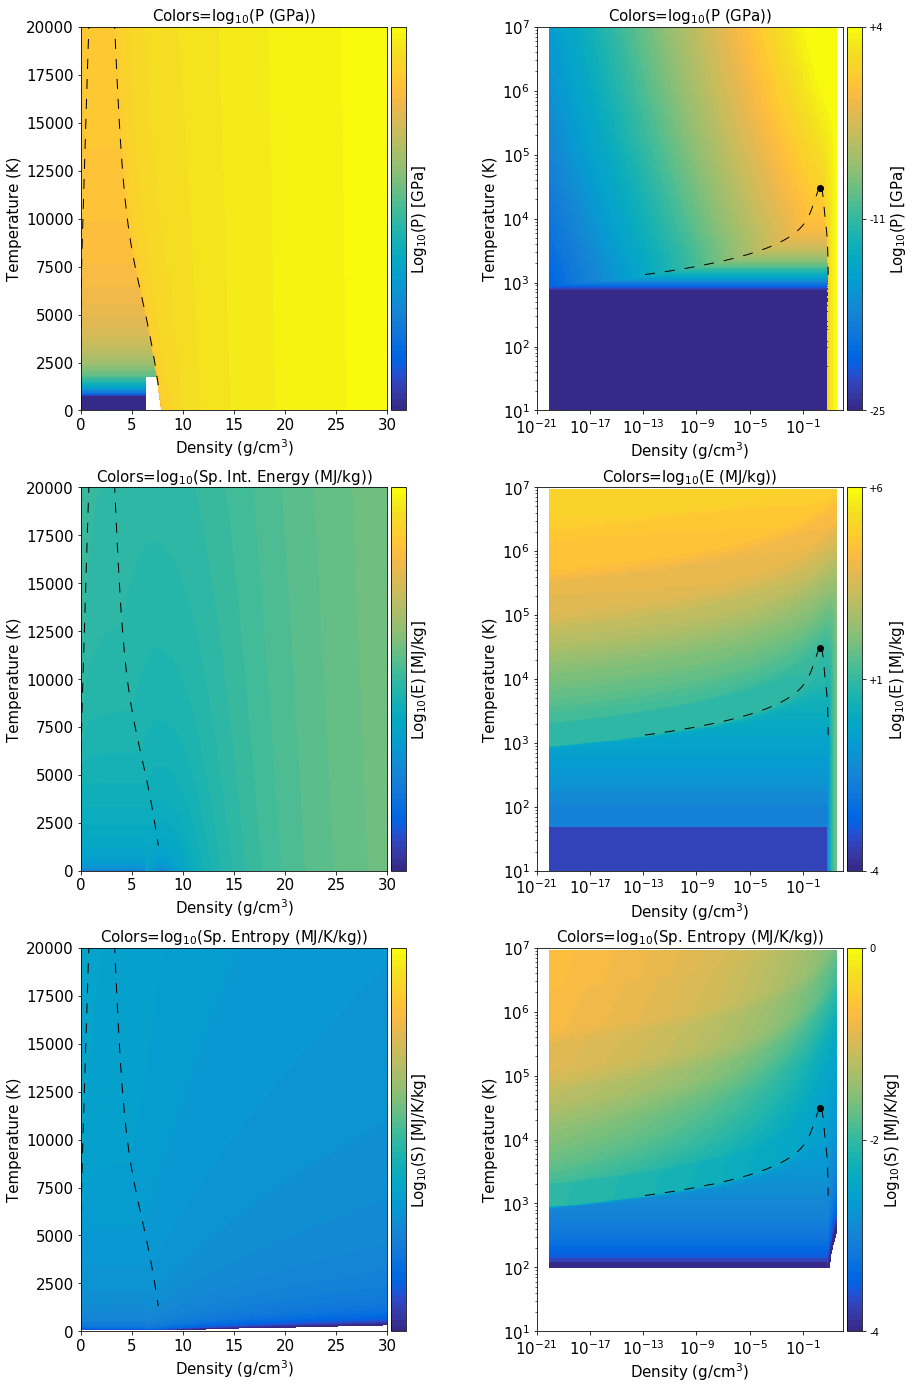

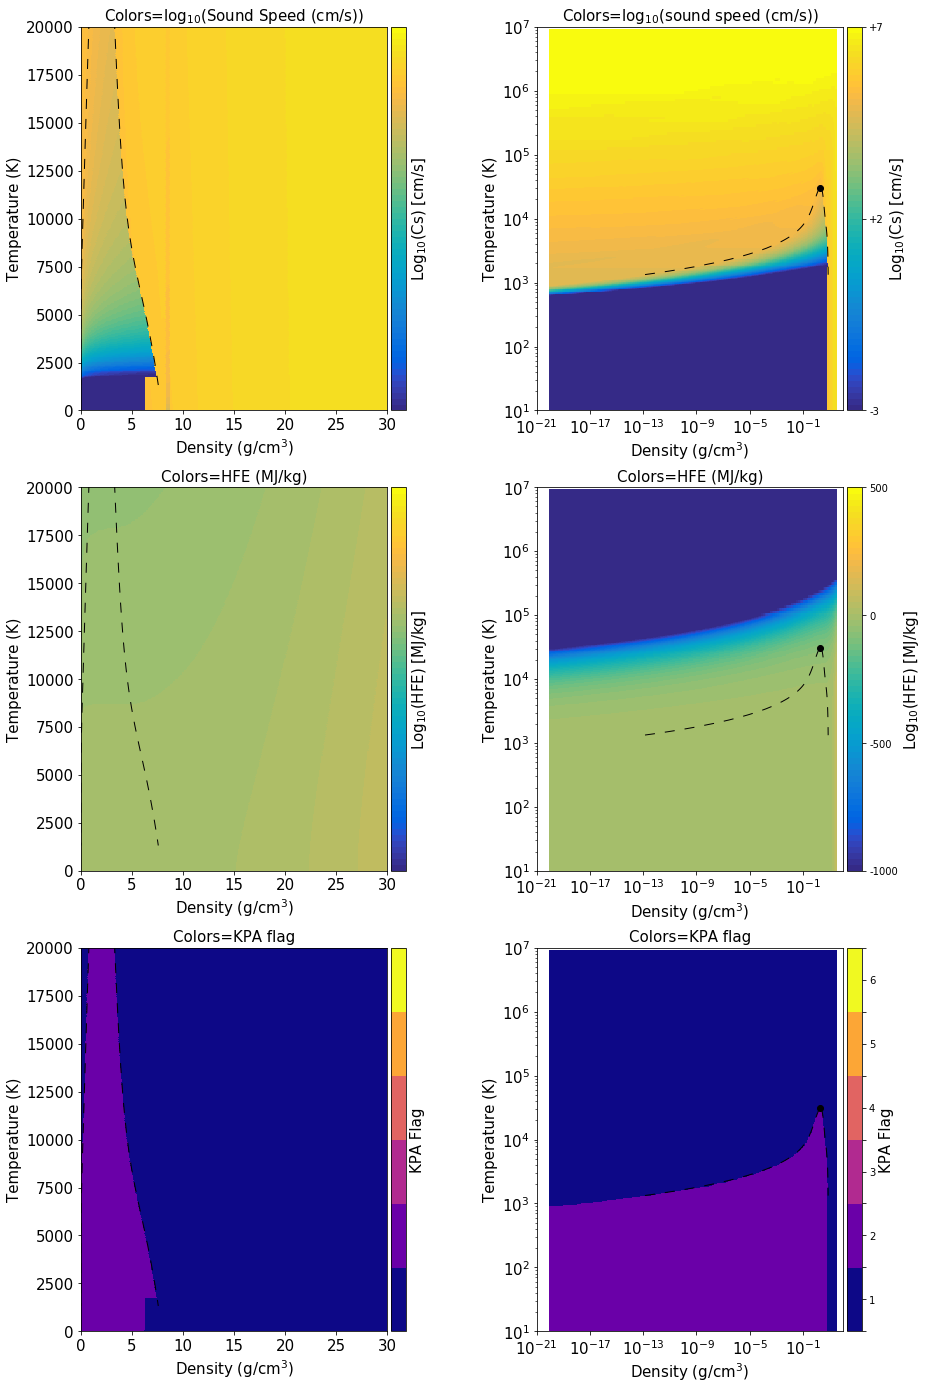

In [10]:
# PLOT COLOR SHADED VALUES RHO-T TABLE
lw=1
sfont = 15
ds = (10,10)

%matplotlib inline
fig, ([ax0, ax1], [ax2,ax3], [ax4,ax5])= plt.subplots(nrows=3,ncols=2,figsize=(14,24))
plt.subplots_adjust(wspace=0.4)
#plt.tight_layout(pad=0.6)

##================ Pressure
im1=ax0.pcolormesh(NewEOS.rho,NewEOS.T,(np.log10(NewEOS.P)+25)/29.,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
ax0.plot(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax0.plot(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax0.plot(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax0.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax0.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax0.set_ylim(0.,20000)
ax0.set_xlim(0,30.)
ax0.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax0.set_ylabel('Temperature (K)',size=sfont)
ax0.set_title('Colors=log$_{10}$(P (GPa))',size=sfont)
ax0.tick_params(labelsize=sfont)

divider0 = make_axes_locatable(ax0)
cax0 = divider0.append_axes('right', size='5%', pad=0.05)
cbar0 = fig.colorbar(im1, cax=cax0, ticks = [],orientation='vertical')
#cbar0.ax.set_yticklabels(['  ','  ','  '])  # vertical colorbar
cbar0.set_label('Log$_{10}$(P) [GPa]',size=sfont)
#cbar0.ax.set_yticklabels(['-25','-11','+4'])  # vertical colorbar

im1=ax1.pcolormesh(NewEOS.rho,NewEOS.T,(np.log10(NewEOS.P)+25)/29.,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
ax1.loglog(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax1.loglog(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax1.loglog(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax1.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax1.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax1.set_ylim(10.,1.E7)
ax1.set_xlim(1.E-21,100.)
ax1.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax1.set_ylabel('Temperature (K)',size=sfont)
ax1.set_title('Colors=log$_{10}$(P (GPa))',size=sfont)
ax1.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
cbar.ax.set_yticklabels(['-25','-11', '+4'])  # vertical colorbar
cbar.set_label('Log$_{10}$(P) [GPa]',size=sfont)


#================ Sp. Int. Energy
im1=ax2.pcolormesh(NewEOS.rho,NewEOS.T,(np.log10(NewEOS.U)+4.)/10.,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
ax2.plot(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax2.plot(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax2.plot(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax2.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax2.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax2.set_ylim(0.,20000)
ax2.set_xlim(0,30.)
ax2.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax2.set_ylabel('Temperature (K)',size=sfont)
ax2.set_title('Colors=log$_{10}$(Sp. Int. Energy (MJ/kg))',size=sfont)
ax2.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
# does not want to label ticks in this location
cbar = fig.colorbar(im1, cax=cax, ticks = [], orientation='vertical')
#cbar.ax.set_yticklabels(['','',''])  # vertical colorbar
cbar.set_label('Log$_{10}$(E) [MJ/kg]',size=sfont)
#cbar.ax.set_yticklabels(['-4','+1','+6'])  # vertical colorbar


ax3.pcolormesh(NewEOS.rho,NewEOS.T,(np.log10(NewEOS.U)+4.)/10.,cmap=local_cmaps.parula,vmin=0,vmax=1)
ax3.loglog(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax3.loglog(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax3.loglog(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax3.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax3.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax3.set_ylim(10.,1.E7)
ax3.set_xlim(1.E-21,100.)
ax3.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax3.set_ylabel('Temperature (K)',size=sfont)
ax3.set_title('Colors=log$_{10}$(E (MJ/kg))',size=sfont)
ax3.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax3)
cax = divider.append_axes('right', size='5%', pad=0.05)
#cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
#cbar.ax.set_yticklabels(['-6', '-3.5', '-1'])  # vertical colorbar
cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
cbar.ax.set_yticklabels(['-4', '+1','+6'])  # vertical colorbar
cbar.set_label('Log$_{10}$(E) [MJ/kg]',size=sfont)

#================ Sp. Entropy
im1=ax4.pcolormesh(NewEOS.rho,NewEOS.T,(np.log10(NewEOS.S)+4.)/4.,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
ax4.plot(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax4.plot(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax4.plot(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax4.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax4.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax4.set_ylim(0.,20000)
ax4.set_xlim(0,30.)
ax4.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax4.set_ylabel('Temperature (K)',size=sfont)
ax4.set_title('Colors=log$_{10}$(Sp. Entropy (MJ/K/kg))',size=sfont)
ax4.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax4)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im1, cax=cax, ticks = [], orientation='vertical')
#cbar.ax.set_yticklabels(['-4', '-2', '0'])  # vertical colorbar
cbar.set_label('Log$_{10}$(S) [MJ/K/kg]',size=sfont)


ax5.pcolormesh(NewEOS.rho,NewEOS.T,(np.log10(NewEOS.S)+4.)/4.,cmap=local_cmaps.parula,vmin=0,vmax=1)
ax5.loglog(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax5.loglog(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax5.loglog(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax5.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax5.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax5.set_ylim(10.,1.E7)
ax5.set_xlim(1.E-21,100.)
ax5.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax5.set_ylabel('Temperature (K)',size=sfont)
ax5.set_title('Colors=log$_{10}$(Sp. Entropy (MJ/K/kg))',size=sfont)
ax5.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax5)
cax = divider.append_axes('right', size='5%', pad=0.05)
#cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
#cbar.ax.set_yticklabels(['-6', '-3.5', '-1'])  # vertical colorbar
cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
cbar.ax.set_yticklabels(['-4', '-2','0'])  # vertical colorbar
cbar.set_label('Log$_{10}$(S) [MJ/K/kg]',size=sfont)


##============= start new plot
fig2, ([ax0, ax1], [ax2,ax3], [ax4,ax5])= plt.subplots(nrows=3,ncols=2,figsize=(14,24))
plt.subplots_adjust(wspace=0.4)

#================ Sound Speed
im1=ax0.pcolormesh(NewEOS.rho,NewEOS.T,(np.log10(NewEOS.cs)+3.)/10.,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
ax0.plot(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax0.plot(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax0.plot(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax0.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax0.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax0.set_ylim(0.,20000)
ax0.set_xlim(0,30.)
ax0.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax0.set_ylabel('Temperature (K)',size=sfont)
ax0.set_title('Colors=log$_{10}$(Sound Speed (cm/s))',size=sfont)
ax0.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax0)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im1, cax=cax, ticks = [], orientation='vertical')
#cbar.ax.set_yticklabels(['-3', '+2', '+7'])  # vertical colorbar
cbar.set_label('Log$_{10}$(Cs) [cm/s]',size=sfont)


ax1.pcolormesh(NewEOS.rho,NewEOS.T,(np.log10(NewEOS.cs)+3.)/10.,cmap=local_cmaps.parula,vmin=0,vmax=1)
ax1.loglog(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax1.loglog(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax1.loglog(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax1.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax1.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax1.set_ylim(10.,1.E7)
ax1.set_xlim(1.E-21,100.)
ax1.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax1.set_ylabel('Temperature (K)',size=sfont)
ax1.set_title('Colors=log$_{10}$(sound speed (cm/s))',size=sfont)
ax1.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
#cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
#cbar.ax.set_yticklabels(['-6', '-3.5', '-1'])  # vertical colorbar
cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
cbar.ax.set_yticklabels(['-3', '+2', '+7'])  # vertical colorbar
cbar.set_label('Log$_{10}$(Cs) [cm/s]',size=sfont)


#================ HFE
amin = np.min(NewEOS.A)
amin = -1000.
alogmax = 1500. #np.max(anaarrodd)-amin #np.max(np.log10(anaarrodd-amin))
#print('amin, log10(amin)',amin,np.log10(-amin))
#print('alogmax=',alogmax)
im1=ax2.pcolormesh(NewEOS.rho,NewEOS.T,(NewEOS.A-amin)/alogmax,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
ax2.plot(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax2.plot(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax2.plot(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax2.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax2.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax2.set_ylim(0.,20000)
ax2.set_xlim(0,30.)
ax2.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax2.set_ylabel('Temperature (K)',size=sfont)
ax2.set_title('Colors=HFE (MJ/kg)',size=sfont)
ax2.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im1, cax=cax, ticks = [], orientation='vertical')
#cbar.ax.set_yticklabels(['-1000','-500','0','500'])  # vertical colorbar
cbar.set_label('Log$_{10}$(HFE) [MJ/kg]',size=sfont)


ax3.pcolormesh(NewEOS.rho,NewEOS.T,(NewEOS.A-amin)/alogmax,cmap=local_cmaps.parula,vmin=0,vmax=1)
ax3.loglog(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax3.loglog(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax3.loglog(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax3.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax3.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax3.set_ylim(10.,1.E7)
ax3.set_xlim(1.E-21,100.)
ax3.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax3.set_ylabel('Temperature (K)',size=sfont)
ax3.set_title('Colors=HFE (MJ/kg)',size=sfont)
ax3.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax3)
cax = divider.append_axes('right', size='5%', pad=0.05)
#cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
#cbar.ax.set_yticklabels(['-6', '-3.5', '-1'])  # vertical colorbar
cbar = fig.colorbar(im1, cax=cax, ticks = [0,.333,.6667,  1], orientation='vertical')
cbar.ax.set_yticklabels(['-1000','-500','0','500'])  # vertical colorbar
cbar.set_label('Log$_{10}$(HFE) [MJ/kg]',size=sfont)



#================ KPA flag
cmap2 = cm.get_cmap('plasma', 6)    # 6 discrete colors

im1=ax4.pcolormesh(NewEOS.rho,NewEOS.T,((NewEOS.KPA)-0.5)/6.,cmap=cmap2,vmin=0,vmax=1,edgecolors='face')
#im1=ax4.pcolormesh(NewEOS.rho,NewEOS.T,((NewEOS.KPA))/6.,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
ax4.plot(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax4.plot(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax4.plot(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax4.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax4.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax4.set_ylim(0.,20000)
ax4.set_xlim(0,30.)
ax4.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax4.set_ylabel('Temperature (K)',size=sfont)
ax4.set_title('Colors=KPA flag',size=sfont)
ax4.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax4)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im1, cax=cax, ticks = [], orientation='vertical')
#cbar.ax.set_yticklabels(['0','1','2','3','4','5',  '6'])  # vertical colorbar
cbar.set_label('KPA Flag',size=sfont)


ax5.pcolormesh(NewEOS.rho,NewEOS.T,((NewEOS.KPA)-0.5)/6.,cmap=cmap2,vmin=0,vmax=1)
ax5.loglog(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax5.loglog(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax5.loglog(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax5.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax5.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax5.set_ylim(10.,1.E7)
ax5.set_xlim(1.E-21,100.)
ax5.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax5.set_ylabel('Temperature (K)',size=sfont)
ax5.set_title('Colors=KPA flag',size=sfont)
ax5.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax5)
cax = divider.append_axes('right', size='5%', pad=0.05)
#cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
#cbar.ax.set_yticklabels(['-6', '-3.5', '-1'])  # vertical colorbar
cbar = fig.colorbar(im1, cax=cax, ticks = np.arange(13)/12, orientation='vertical')
cbar.ax.set_yticklabels(['','1','','2','','3','','4','','5','',  '6'])  # vertical colorbar
cbar.set_label('KPA Flag',size=sfont)


fig2.show()



## ANEOS Hugoniots Compared to Experimental Data

The following plots compare the ANEOS model Hugoniots with laboratory data downloaded from the shock wave database at http://ihed.ras.ru/rusbank/

Entropy on the Principal Hugoniot derived by Kraus et al. 2015.

ANEOS Hugoniot: red -- calculated in the ANEOS code using model reference density and temperature.

Calculated Hugoniot: blue -- calculated by linear interpolation of the EOS table starting at model reference density and temperature.

The liquid Hugoniot is calculated in Kraus et al. 2015 starting at the boiling point of liquid iron at 1 bar: 6.01 g/cm$^3$, 3133 K. The ANEOS model Hugoniot is shown for comparison.


Requested ANEOS Hugoniot initial state from (THUG,RHUG) (red curves in plots below):
Initial Pressure (GPa): 3.8109e-13
Initial Temperature (K): 298.0
Initial Sp. Entropy (MJ/K/kg): 0.0006058099999999999
Initial Sp. Internal Energy (MJ/kg): 0.13392
Initial Density (g/cm3): 7.85

Calculated Hugoniot using (T0REF,R0REF) initial state (blue curves in plots below):
Initial Pressure (GPa): 0.000178538502
Initial Temperature (K): 298.0
Initial Sp. Entropy (MJ/K/kg): 0.000605879637
Initial Sp. Internal Energy (MJ/kg): 0.133936601
Initial Density (g/cm3): 7.85


/Users/sstewart/Dropbox/eos/github/aneos-iron-beta/aneos-iron-2020/aneos-T70/eostable.py:490: RuntimeWarning: invalid value encountered in sqrt
  upnew = np.sqrt((pnew-p0)*(1./r00-1./self.rho[iir]))
/Users/sstewart/Dropbox/eos/github/aneos-iron-beta/aneos-iron-2020/aneos-T70/eostable.py:491: RuntimeWarning: invalid value encountered in sqrt
  usnew = (1./r00)*np.sqrt((pnew-p0)/(1./r00-1./self.rho[iir]))


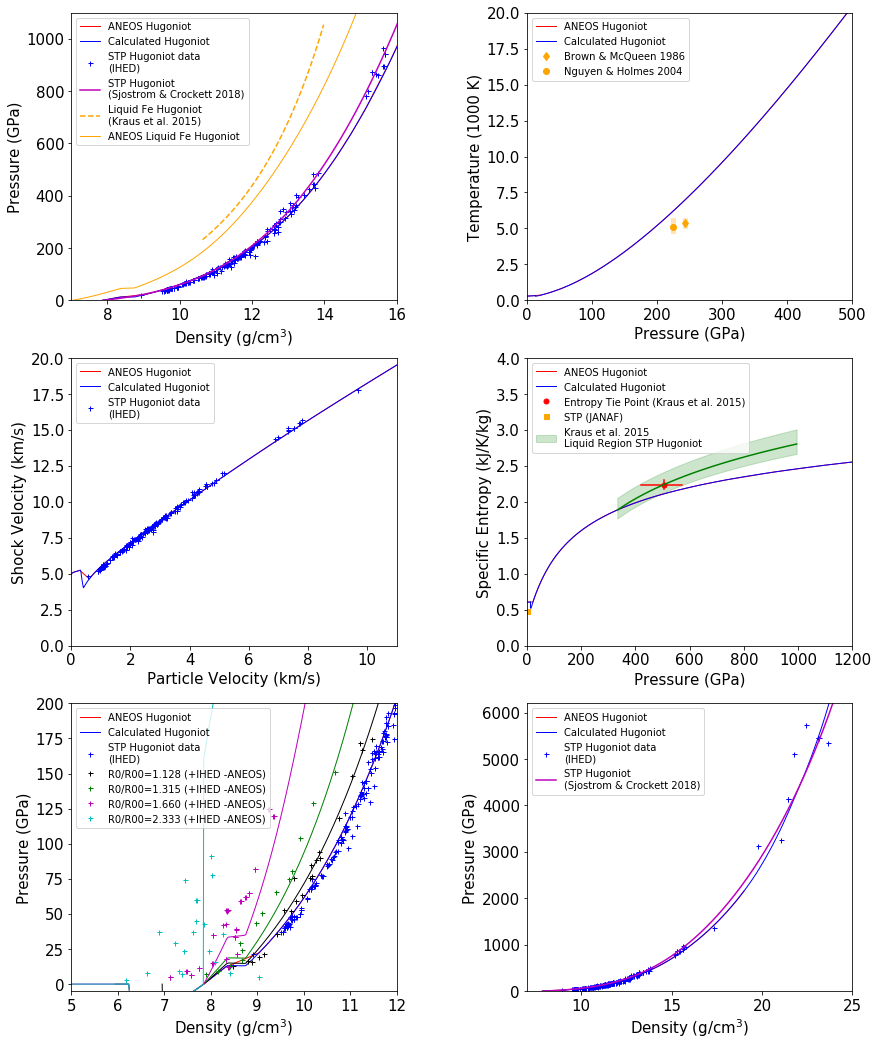

In [11]:
# Display the initial conditions for the Hugoniot in ANEOS.OUTPUT    
print('\nRequested ANEOS Hugoniot initial state from (THUG,RHUG) (red curves in plots below):')
print('Initial Pressure (GPa):',NewEOS.anhug.P[0])
print('Initial Temperature (K):',NewEOS.anhug.T[0])
print('Initial Sp. Entropy (MJ/K/kg):',NewEOS.anhug.S[0])
print('Initial Sp. Internal Energy (MJ/kg):',NewEOS.anhug.U[0])
print('Initial Density (g/cm3):',NewEOS.anhug.rho[0])
#
print('\nCalculated Hugoniot using (T0REF,R0REF) initial state (blue curves in plots below):')
print('Initial Pressure (GPa):',NewEOS.hug.P[0])
print('Initial Temperature (K):',NewEOS.hug.T[0])
print('Initial Sp. Entropy (MJ/K/kg):',NewEOS.hug.S[0])
print('Initial Sp. Internal Energy (MJ/kg):',NewEOS.hug.U[0])
print('Initial Density (g/cm3):',NewEOS.hug.rho[0])

#========== PLOTTING STYLES FOR LOTS OF PLOTS =================
styleqmd = ['^','red',5,' ']
stylezdat = ['+','black',5,'Porous Fe Hugoniot\n(IHED)']
stylegg = ['+','blue',5,'STP Hugoniot data\n(IHED)']
styleliq = ['--','orange',7,'Liquid Fe Hugoniot\n(Kraus et al. 2015)']
styleliqhug = ['-','orange',1,'ANEOS Liquid Fe Hugoniot']
stylezfit = ['-','green',1,' ']
styleanhug = ['-','red',1,'ANEOS Hugoniot']
stylestphug = ['-','blue',1,'Calculated Hugoniot']
styleanphase = ['-','black',1,'ANEOS Phase Boundaries']
stylephasept = ['o','black',6]



#======================LOTS OF PLOTS============================
# plot the Hugoniots for comparison
sfont = 15
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14,18))
plt.subplots_adjust(wspace=0.4)

#-------------
# Pressure-Density Data vs. ANEOS
ai=0
aj=0
#axes[ai,aj].plot(QMDH_r[1::],QMDH_p[1::],styleqmd[0],markersize=styleqmd[2],color=styleqmd[1],label=styleqmd[3])
#axes[ai,aj].plot(Zdat_r,Zdat_p,stylezdat[0],markersize=stylezdat[2],color=stylezdat[1],label=stylezdat[3])
#axes[ai,aj].plot(LowHugDat_r,LowHugDat_p,stylegg[0],markersize=stylegg[2],color=stylegg[1],label=stylegg[3])
#axes[ai,aj].plot(Zfit_r,Zfit_p,stylezfit[0],linewidth=stylezfit[2],color=stylezfit[1],label=stylezfit[3])
axes[ai,aj].plot(NewEOS.anhug.rho,NewEOS.anhug.P,styleanhug[0],linewidth=styleanhug[2],color=styleanhug[1],label=styleanhug[3])
axes[ai,aj].plot(NewEOS.hug.rho,NewEOS.hug.P,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(ihed_datarr[ihed_fullden,4]*ihed_rho0,ihed_datarr[ihed_fullden,3],stylegg[0],markersize=stylegg[2],color=stylegg[1],label=stylegg[3])
axes[ai,aj].plot(scironrarr,scironparr,'-',color='m',label='STP Hugoniot\n(Sjostrom & Crockett 2018)')

# Kraus Liquid Iron Hugoniot at 1 bar boiling point
axes[ai,aj].plot(krausironliqrarr[40:100], krausironliqparr[40:100],styleliq[0],markersize=styleliq[2],color=styleliq[1],label=styleliq[3])
                 #linestyle='-',color='cyan',label='Kraus et al. 2015\n1-bar Boiling Pt. Liquid Hugoniot')

# ANEOS LIQUID HUGONIOT
# Calculate the model Hugoniot with the same initial state as Thomas & Asimow 2013
NewEOS.calchugoniot(r0=ironliq_r0,t0=ironliq_t0)
axes[ai,aj].plot(NewEOS.hug.rho,NewEOS.hug.P,styleliqhug[0],linewidth=styleliqhug[2],color=styleliqhug[1],label=styleliqhug[3])
# Put the STP hugoniot back into the structure
NewEOS.calchugoniot(r0=NewEOS.R0REF,t0=NewEOS.T0REF)

axes[ai,aj].set_ylim(0,1100)
axes[ai,aj].set_xlim(7.,16.)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].legend(fontsize=sfont-5)

#-------------
# Pressure - Temperature Data vs. ANEOS
ai=0
aj=1

#axes[ai,aj].plot(QMDH_p[1::],QMDH_t[1::]/1.E3,styleqmd[0],markersize=styleqmd[2],color=styleqmd[1],label=styleqmd[3])
#axes[ai,aj].errorbar(ZTdat_p,ZTdat_t/1.E3,xerr=ZTdat_perr,yerr=ZTdat_terr/1.E3,fmt=stylezdat[0],markersize=stylezdat[2],color=stylezdat[1],label=stylezdat[3],elinewidth=1)
#axes[ai,aj].plot(Zfit_p,Zfit_t/1.E3,stylezfit[0],linewidth=stylezfit[2],color=stylezfit[1],label=stylezfit[3])
axes[ai,aj].plot(NewEOS.anhug.P,NewEOS.anhug.T/1.E3,styleanhug[0],linewidth=styleanhug[2],color=styleanhug[1],label=styleanhug[3])
axes[ai,aj].plot(NewEOS.hug.P,NewEOS.hug.T/1.E3,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])

## add squares
rect = Rectangle((240.,5.),6.,.700,linewidth=1,edgecolor='moccasin',facecolor='moccasin')
axes[ai,aj].add_patch(rect)
axes[ai,aj].plot(243.,5.350,'d',color='orange',label='Brown & McQueen 1986')
rect = Rectangle((222.,4.7),6.,1.000,linewidth=1,edgecolor='moccasin',facecolor='moccasin')
axes[ai,aj].add_patch(rect)
axes[ai,aj].plot(225.,5.100,'o',color='orange',label='Nguyen & Holmes 2004')

axes[ai,aj].set_xlim(0,500)
axes[ai,aj].set_ylim(0,20)
axes[ai,aj].set_ylabel('Temperature (1000 K)',size=sfont)
axes[ai,aj].set_xlabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].legend(fontsize=sfont-5)

#-------------
# Particle Velocity vs. Shock Velocity; Data vs. ANEOS
ai=1
aj=0

#axes[ai,aj].plot(QMDH_up[1::],QMDH_us[1::],styleqmd[0],markersize=styleqmd[2],color=styleqmd[1],label=styleqmd[3])
#axes[ai,aj].errorbar(Zdat_up,Zdat_us,xerr=Zdat_uperr,yerr=Zdat_userr,fmt=stylezdat[0],markersize=stylezdat[2],color=stylezdat[1],label=stylezdat[3],elinewidth=1)
#axes[ai,aj].plot(LowHugDat_up,LowHugDat_us,stylegg[0],markersize=stylegg[2],color=stylegg[1],label=stylegg[3])
#axes[ai,aj].plot(Zfit_up,Zfit_us,stylezfit[0],linewidth=stylezfit[2],color=stylezfit[1],label=stylezfit[3])
axes[ai,aj].plot(NewEOS.anhug.up,NewEOS.anhug.us,styleanhug[0],linewidth=styleanhug[2],color=styleanhug[1],label=styleanhug[3])
axes[ai,aj].plot(NewEOS.hug.up,NewEOS.hug.us,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(ihed_datarr[ihed_fullden,1],ihed_datarr[ihed_fullden,2],stylegg[0],markersize=stylegg[2],color=stylegg[1],label=stylegg[3])

#axes[ai,aj].plot(foliq_up,foliq_us,styleliq[0],markersize=styleliq[2],color=styleliq[1],label=styleliq[3])
# ANEOS LIQUID HUGONIOT
# Calculate the model Hugoniot with the same initial state as Thomas & Asimow 2013
#NewEOS.calchugoniot(r0=foliq_r0,t0=foliq_t0)
#axes[ai,aj].plot(NewEOS.hug.up,NewEOS.hug.us,styleliqhug[0],linewidth=styleliqhug[2],color=styleliqhug[1],label=styleliqhug[3])
# Put the STP hugoniot back into the structure
#NewEOS.calchugoniot(r0=NewEOS.R0REF,t0=NewEOS.T0REF)

axes[ai,aj].set_xlim(0,11)
axes[ai,aj].set_ylim(0,20)
axes[ai,aj].set_xlabel('Particle Velocity (km/s)',size=sfont)
axes[ai,aj].set_ylabel('Shock Velocity (km/s)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].legend(fontsize=sfont-5)

#-------------
# Sp. Entropy vs Pressure; Calculated from experiments vs. ANEOS
ai=1
aj=1

#axes[ai,aj].plot(Zfit_p,Zfit_s*1.E3,stylezfit[0],linewidth=stylezfit[2],color=stylezfit[1],label=stylezfit[3])
#axes[ai,aj].fill_between(Zfit_p,(Zfit_s-Zfit_serr)*1000.,(Zfit_s+Zfit_serr)*1000.,color=stylezfit[1],alpha=0.2)
# pressure error envelope is tiny and can't be seen on this scale
#axes[ai,aj].fill_betweenx(Zfit_s*1000.,(Zfit_p-Zfit_perr),(Zfit_p+Zfit_perr),color='red',alpha=0.2)
axes[ai,aj].plot(NewEOS.anhug.P,NewEOS.anhug.S*1.E3,styleanhug[0],linewidth=styleanhug[2],color=styleanhug[1],label=styleanhug[3])
axes[ai,aj].plot(NewEOS.hug.P,NewEOS.hug.S*1.E3,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
# Tie point from Kraus et al. 2015
axes[ai,aj].plot(Ztie_p,Ztie_s*1.E3,'o',markersize=5,color='red',label='Entropy Tie Point (Kraus et al. 2015)')
axes[ai,aj].plot([Ztie_p+Ztie_perrlow,Ztie_p+Ztie_perrhigh],[Ztie_s*1.E3,Ztie_s*1.E3],'-',color='red')
axes[ai,aj].plot([Ztie_p,Ztie_p],[(Ztie_s-Ztie_serr)*1.E3,(Ztie_s+Ztie_serr)*1.E3],'-',color='red')
# Iron at STP from JANAF
axes[ai,aj].plot(1.E-4,ironSTP_S*1.E3,'s',markersize=5,color='orange',label='STP (JANAF)')

colstr='green'
axes[ai,aj].plot(krausironparr[40:80], krausironsarr[40:80]/1.e3, linestyle='-',color=colstr)
#axes[ai,aj].plot(krausironparr[40:80], krausironsarr[40:80]/1.e3, linestyle='-',color=colstr,label='Kraus et al. 2015\nLiquid Region STP Hugoniot')
#axes[ai,aj].plot(krausironparr[40:80], krausironsuarr[40:80]/1.e3, linestyle=':',color=colstr)
#axes[ai,aj].plot(krausironparr[40:80], krausironslarr[40:80]/1.e3, linestyle=':',color=colstr)
axes[ai,aj].fill_between(krausironparr[40:80],krausironslarr[40:80]/1.e3,krausironsuarr[40:80]/1.e3,color='green',alpha=0.2,label='Kraus et al. 2015\nLiquid Region STP Hugoniot')


axes[ai,aj].set_ylim(0,4.)
axes[ai,aj].set_xlim(0,1200)
axes[ai,aj].set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].set_xlabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].legend(fontsize=sfont-5)

#-------------
# Pressure-Density Data vs. ANEOS   LOW PRESSURE + LIQUID HUGONIOT
ai=2
aj=0
#axes[ai,aj].plot(QMDH_r[1::],QMDH_p[1::],styleqmd[0],markersize=styleqmd[2],color=styleqmd[1],label=styleqmd[3])
#axes[ai,aj].plot(Zdat_r,Zdat_p,stylezdat[0],markersize=stylezdat[2],color=stylezdat[1],label=stylezdat[3])
#axes[ai,aj].plot(LowHugDat_r,LowHugDat_p,stylegg[0],markersize=stylegg[2],color=stylegg[1],label=stylegg[3])
# Liquid forsterite Hugoniot Data
#axes[ai,aj].plot(foliq_r,foliq_p,styleliq[0],markersize=styleliq[2],color=styleliq[1],label=styleliq[3])
#axes[ai,aj].plot(foliq_r0,0,styleliq[0],markersize=styleliq[2],color=styleliq[1])
#axes[ai,aj].plot(Zfit_r,Zfit_p,stylezfit[0],linewidth=stylezfit[2],color=stylezfit[1],label=stylezfit[3])
# ANEOS REFERENCE POINT (STP) Hugoniots
axes[ai,aj].plot(NewEOS.anhug.rho,NewEOS.anhug.P,styleanhug[0],linewidth=styleanhug[2],color=styleanhug[1],label=styleanhug[3])
axes[ai,aj].plot(NewEOS.hug.rho,NewEOS.hug.P,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(ihed_datarr[ihed_fullden,4]*ihed_rho0,ihed_datarr[ihed_fullden,3],stylegg[0],markersize=stylegg[2],color=stylegg[1],label=stylegg[3])


# POROUS HUGONIOT m=R0/R00=1.128
m=1.128
colstr='black'
labstr='R0/R00=1.128 (+IHED -ANEOS)'
ihed_porous = np.where(ihed_datarr[:,0] == m)[0]
axes[ai,aj].plot(ihed_datarr[ihed_porous,4]*ihed_rho0,ihed_datarr[ihed_porous,3],'+',markersize=5,color=colstr,label=labstr)
NewEOS.calcporoushugoniot(r0=NewEOS.R0REF,t0=NewEOS.T0REF,r00=NewEOS.R0REF/m)
axes[ai,aj].plot(NewEOS.hug.rho,NewEOS.hug.P,styleliqhug[0],linewidth=styleliqhug[2],color=colstr)
# Put the STP hugoniot back into the structure
NewEOS.calchugoniot(r0=NewEOS.R0REF,t0=NewEOS.T0REF)

# POROUS HUGONIOT m=R0/R00=1.315
m=1.315
colstr='green'
labstr='R0/R00=1.315 (+IHED -ANEOS)'
ihed_porous = np.where(ihed_datarr[:,0] == m)[0]
axes[ai,aj].plot(ihed_datarr[ihed_porous,4]*ihed_rho0,ihed_datarr[ihed_porous,3],'+',markersize=5,color=colstr,label=labstr)
NewEOS.calcporoushugoniot(r0=NewEOS.R0REF,t0=NewEOS.T0REF,r00=NewEOS.R0REF/m)
axes[ai,aj].plot(NewEOS.hug.rho,NewEOS.hug.P,styleliqhug[0],linewidth=styleliqhug[2],color=colstr)

# POROUS HUGONIOT m=R0/R00=1.660
m=1.660
colstr='m'
labstr='R0/R00=1.660 (+IHED -ANEOS)'
ihed_porous = np.where(ihed_datarr[:,0] == m)[0]
axes[ai,aj].plot(ihed_datarr[ihed_porous,4]*ihed_rho0,ihed_datarr[ihed_porous,3],'+',markersize=5,color=colstr,label=labstr)
NewEOS.calcporoushugoniot(r0=NewEOS.R0REF,t0=NewEOS.T0REF,r00=NewEOS.R0REF/m)
axes[ai,aj].plot(NewEOS.hug.rho,NewEOS.hug.P,styleliqhug[0],linewidth=styleliqhug[2],color=colstr)

# POROUS HUGONIOT m=R0/R00=2.333
m=2.333
colstr='c'
labstr='R0/R00=2.333 (+IHED -ANEOS)'
ihed_porous = np.where(ihed_datarr[:,0] == m)[0]
axes[ai,aj].plot(ihed_datarr[ihed_porous,4]*ihed_rho0,ihed_datarr[ihed_porous,3],'+',markersize=5,color=colstr,label=labstr)
NewEOS.calcporoushugoniot(r0=NewEOS.R0REF,t0=NewEOS.T0REF,r00=NewEOS.R0REF/m)
axes[ai,aj].plot(NewEOS.hug.rho,NewEOS.hug.P,styleliqhug[0],linewidth=styleliqhug[2],color=colstr)


# Put the STP hugoniot back into the structure
NewEOS.calchugoniot(r0=NewEOS.R0REF,t0=NewEOS.T0REF)

axes[ai,aj].set_ylim(-5,200)
axes[ai,aj].set_xlim(5,12.)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].legend(fontsize=sfont-5)

#-------------
# Pressure-Density Data vs. ANEOS   EXTRAPOLATED HIGH PRESSURE
ai=2
aj=1
#axes[ai,aj].plot(QMDH_r[1::],QMDH_p[1::],styleqmd[0],markersize=styleqmd[2],color=styleqmd[1],label=styleqmd[3])
#axes[ai,aj].plot(Zdat_r,Zdat_p,stylezdat[0],markersize=stylezdat[2],color=stylezdat[1],label=stylezdat[3])
#axes[ai,aj].plot(LowHugDat_r,LowHugDat_p,stylegg[0],markersize=stylegg[2],color=stylegg[1],label=stylegg[3])
#axes[ai,aj].plot(Zfit_r,Zfit_p,stylezfit[0],linewidth=stylezfit[2],color=stylezfit[1],label=stylezfit[3])
axes[ai,aj].plot(NewEOS.anhug.rho,NewEOS.anhug.P,styleanhug[0],linewidth=styleanhug[2],color=styleanhug[1],label=styleanhug[3])
axes[ai,aj].plot(NewEOS.hug.rho,NewEOS.hug.P,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(ihed_datarr[ihed_fullden,4]*ihed_rho0,ihed_datarr[ihed_fullden,3],stylegg[0],markersize=stylegg[2],color=stylegg[1],label=stylegg[3])
axes[ai,aj].plot(scironrarr,scironparr,'-',color='m',label='STP Hugoniot\n(Sjostrom & Crockett 2018)')

axes[ai,aj].set_ylim(0,6200)
axes[ai,aj].set_xlim(7.,25.)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].legend(fontsize=sfont-5)




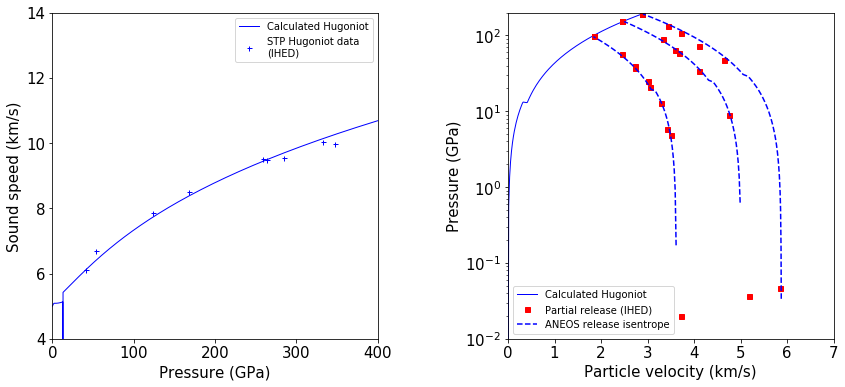

In [12]:
#======================LOTS OF PLOTS============================
# plot the Hugoniots for comparison
sfont = 15
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
plt.subplots_adjust(wspace=0.4)

#-------------
# Pressure-Sound Speed Hugoniot Data vs. ANEOS
ai=0
aj=0
axes[ai].plot(NewEOS.hug.P,NewEOS.hug.cs,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai].plot(ihed_csarr[:,4],ihed_csarr[:,3],stylegg[0],markersize=stylegg[2],color=stylegg[1],label=stylegg[3])

axes[ai].set_xlim(0,400)
axes[ai].set_ylim(4.,14.)
axes[ai].set_ylabel('Sound speed (km/s)',size=sfont)
axes[ai].set_xlabel('Pressure (GPa)',size=sfont)
axes[ai].tick_params(labelsize=sfont)
axes[ai].legend(fontsize=sfont-5)

#-------------
# Particle velocity - Pressure  Data vs. ANEOS
ai=1
aj=1

axes[ai].semilogy(NewEOS.hug.up,NewEOS.hug.P,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai].plot(ihed_relarr[:,3],ihed_relarr[:,4],'s',markersize=stylegg[2],color='red',label='Partial release (IHED)')
axes[ai].plot(ihed_relarr[:,1],ihed_relarr[:,2],'s',markersize=stylegg[2],color='red')

uniqrelarr = np.unique(ihed_relarr[:,2])
for j in range(0,len(uniqrelarr)):
    ptarget=uniqrelarr[j]
    # ANEOS ISENTROPE NEAR SAME PRESSURE
    ANEOSIsen = isentrope_class() # code in eostable.py
    Sisen = np.interp(ptarget,NewEOS.hug.P,NewEOS.hug.S) # MJ/K/kg
    # loop across all densities and extract the values for the requested isentrope
    for i in range(0,NewEOS.ND):
        ind = np.where((NewEOS.S[:,i] > 0))[0]
        interpfunction = interpolate.interp1d(NewEOS.S[ind,i],NewEOS.P[ind,i]) # MJ/K/kg, GPa
        ANEOSIsen.pressure = np.append(ANEOSIsen.pressure,interpfunction(Sisen)) # GPa
        interpfunction = interpolate.interp1d(NewEOS.S[ind,i],NewEOS.T[ind]) # MJ/K/kg, GPa
        ANEOSIsen.temperature = np.append(ANEOSIsen.temperature,interpfunction(Sisen)) # GPa
        interpfunction = interpolate.interp1d(NewEOS.S[ind,i],NewEOS.cs[ind,i]) # MJ/K/kg, cm/s
        ANEOSIsen.soundspeed = np.append(ANEOSIsen.soundspeed,interpfunction(Sisen)) # cm/s
        interpfunction = interpolate.interp1d(NewEOS.S[ind,i],NewEOS.U[ind,i]) # MJ/K/kg, MJ/kg
        ANEOSIsen.energy = np.append(ANEOSIsen.energy,interpfunction(Sisen)) # MJ/kg
    ANEOSIsen.density = np.copy(NewEOS.rho)*1000. # kg/m3
    ANEOSIsen.partvel = np.zeros(NewEOS.ND) # m/s
    ir0 = int(np.round(np.where(ANEOSIsen.pressure >= ptarget)[0][0])) # go up just past the intersection with Hugoniot
    ANEOSIsen.partvel[ir0] = np.interp(ptarget,NewEOS.hug.P,NewEOS.hug.up)*1.E3 # m/s
    #print('ANEOS Starting Pressure:',ptarget)
    iir=ir0-1
    while (ANEOSIsen.pressure[iir]>.0001):
        if iir == ir0-1:
            dp = (ptarget - ANEOSIsen.pressure[iir])*1.E9 # Pa
        else:
            dp = (ANEOSIsen.pressure[iir+1]-ANEOSIsen.pressure[iir])*1.E9 # Pa
        ANEOSIsen.partvel[iir] = ANEOSIsen.partvel[iir+1] + dp/(ANEOSIsen.density[iir]*ANEOSIsen.soundspeed[iir+1]/1.E2) # m/s
        #print(iir,ANEOSIsen.pressure[iir],ANEOSIsen.partvel[iir]/1.e3,dp/1.e9,ANEOSIsen.density[iir])
        iir=iir-1
    # plot aneos isentrope
    tmp = np.where((ANEOSIsen.pressure < ptarget)&(ANEOSIsen.pressure > .01))[0]
    if j == 0:
        axes[ai].plot(ANEOSIsen.partvel[tmp]/1.e3,ANEOSIsen.pressure[tmp],'--',color='blue',label='ANEOS release isentrope')
    else:
        axes[ai].plot(ANEOSIsen.partvel[tmp]/1.e3,ANEOSIsen.pressure[tmp],'--',color='blue')

axes[ai].set_xlim(0,7)
axes[ai].set_ylim(.01,200)
axes[ai].set_xlabel('Particle velocity (km/s)',size=sfont)
axes[ai].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai].tick_params(labelsize=sfont)
axes[ai].legend(fontsize=sfont-5)



## Model Critical Point and Shock-Induced Phase Changes



In [13]:
print('ANEOS Calculated Critical point:')
print('   Temperature (K):       ',NewEOS.cp.T)
print('   Pressure (GPa):        ', NewEOS.cp.P)
print('   Density (g/cm^3):      ',NewEOS.cp.rho)
print('   Sp. Energy (MJ/kg):    ', NewEOS.cp.U)
print('   Sp. Entropy (kJ/K/kg): ', NewEOS.cp.S*1.e3)
print('\n')
print('ANEOS Calculated Values at 1 bar:')
print('   Temperature at melting (K):                     ', NewEOS.onebar.Tmelt)
print('   Liquid density at melting (g/cm^3):             ', NewEOS.onebar.rhocm)
print('   Sp. Entropy at inc. melting Sim (kJ/K/kg):      ', NewEOS.onebar.Sim*1.E3)
print('   Sp. Entropy at com. melting Scm (kJ/K/kg):      ', NewEOS.onebar.Scm*1.E3)
print('   Temperature at boiling (K):                     ', NewEOS.onebar.Tvap)
print('   Liquid density at boiling (g/cm^3):             ', NewEOS.onebar.rhoiv)
print('   Sp. Entropy at inc. vaporization Siv (kJ/K/kg): ', NewEOS.onebar.Siv*1.E3)
print('   Sp. Entropy at com. vaporization Scv (kJ/K/kg): ', NewEOS.onebar.Scv*1.E3)
print('\n')
if NewEOS.tp.T > 0:
    print('ANEOS Calculated Triple Point:')
    print('   Temperature (K):                        ',NewEOS.tp.T)
    print('   Pressure (GPa):                         ', NewEOS.tp.P)
    print('   Solid density (g/cm^3):                 ',NewEOS.tp.rhos)
    print('   Liquid density (g/cm^3):                ',NewEOS.tp.rhol)
    print('   Vapor density (g/cm^3):                 ',NewEOS.tp.rhov)
    print('   Sp. Entropy at inc. melt Sim (kJ/K/kg): ', NewEOS.tp.Sim*1.E3)
    print('   Sp. Entropy at com. melt Scm (kJ/K/kg): ', NewEOS.tp.Scm*1.E3)
    print('   Sp. Entropy at inc. vap. Siv (kJ/K/kg): ', NewEOS.tp.Siv*1.E3)
    print('   Sp. Entropy at com. vap. Scv (kJ/K/kg): ', NewEOS.tp.Scv*1.E3)
else:
    print('ANEOS: No melt curve or triple point in this calculation.')
print('\n')
print('USING MODEL ENTROPIES:')
print('Starting at reference conditions (rho,T): ',NewEOS.R0REF,NewEOS.T0REF, ' (g/cm^3, K)')
print('ANEOS model conditions for shock-induced vaporization on release to 1 bar:')
print('                     :         IM        CM        IV      50%V        CV')
print('Shock Pressure (GPa) : {:10.2f}{:10.2f}{:10.2f}{:10.2f}{:10.2f}'.format(
    np.interp(NewEOS.onebar.Sim,NewEOS.hug.S,NewEOS.hug.P),
    np.interp(NewEOS.onebar.Scm,NewEOS.hug.S,NewEOS.hug.P),
    np.interp(NewEOS.onebar.Siv,NewEOS.hug.S,NewEOS.hug.P),
    np.interp(NewEOS.onebar.Siv+0.5*(NewEOS.onebar.Scv-NewEOS.onebar.Siv),NewEOS.hug.S,NewEOS.hug.P),
    np.interp(NewEOS.onebar.Scv,NewEOS.hug.S,NewEOS.hug.P)))
print('Imp. Match Vel (km/s): {:10.2f}{:10.2f}{:10.2f}{:10.2f}{:10.2f}'.format(
    np.interp(NewEOS.onebar.Sim,NewEOS.hug.S,NewEOS.hug.up)*2,
    np.interp(NewEOS.onebar.Scm,NewEOS.hug.S,NewEOS.hug.up)*2,
    np.interp(NewEOS.onebar.Siv,NewEOS.hug.S,NewEOS.hug.up)*2,
    np.interp(NewEOS.onebar.Siv+0.5*(NewEOS.onebar.Scv-NewEOS.onebar.Siv),NewEOS.hug.S,NewEOS.hug.up)*2,
    np.interp(NewEOS.onebar.Scv,NewEOS.hug.S,NewEOS.hug.up)*2))

print('\n')
print('USING JANAF ENTROPIES AT 1 BAR:')
print('Starting at reference conditions (rho,T): ',NewEOS.R0REF,NewEOS.T0REF, ' (g/cm^3, K)')
print('ANEOS model conditions for shock-induced vaporization on release to 1 bar (JANAF):')
print('                     :         IM        CM        IV      50%V        CV')
print('Shock Pressure (GPa) : {:10.2f}{:10.2f}{:10.2f}{:10.2f}{:10.2f}'.format(
    np.interp(92.190/NewEOS.FMW/1.e3,NewEOS.hug.S,NewEOS.hug.P),
    np.interp(99.823/NewEOS.FMW/1.e3,NewEOS.hug.S,NewEOS.hug.P),
    np.interp(2.24e-3,NewEOS.hug.S,NewEOS.hug.P),
    np.interp(2.24e-3+0.5*((4.238-2.24)*1.e-3),NewEOS.hug.S,NewEOS.hug.P),
    np.interp(4.238e-3,NewEOS.hug.S,NewEOS.hug.P)))

stop

ANEOS Calculated Critical point:
   Temperature (K):        30620.9
   Pressure (GPa):         5.4236
   Density (g/cm^3):       1.99956
   Sp. Energy (MJ/kg):     14.2448
   Sp. Entropy (kJ/K/kg):  2.9204399999999997


ANEOS Calculated Values at 1 bar:
   Temperature at melting (K):                      0.0
   Liquid density at melting (g/cm^3):              0.0
   Sp. Entropy at inc. melting Sim (kJ/K/kg):       0.0
   Sp. Entropy at com. melting Scm (kJ/K/kg):       0.0
   Temperature at boiling (K):                      3470.36
   Liquid density at boiling (g/cm^3):              6.91249
   Sp. Entropy at inc. vaporization Siv (kJ/K/kg):  1.78149
   Sp. Entropy at com. vaporization Scv (kJ/K/kg):  3.7651


ANEOS: No melt curve or triple point in this calculation.


USING MODEL ENTROPIES:
Starting at reference conditions (rho,T):  7.85 298.0  (g/cm^3, K)
ANEOS model conditions for shock-induced vaporization on release to 1 bar:
                     :         IM        CM        IV   

NameError: name 'stop' is not defined

In [ ]:
print(NewEOS.hug.S)

## Model Phase Boundaries

Black lines are the ANEOS phase boundaries. Blue curve is the model Principal Hugoniot.

Orange diamonds are the 1-bar boiling point; orange squares are the 1-bar melting point.

The critical point has not been measured experimentally. There are several ab initio calculations, summarized in Menvedev 2014. The range of calculated critical points are shown below by the light blue box.

In [ ]:
# PHASE DIAGRAM PLOTS
#======================LOTS OF PLOTS============================
# Plot aneos phase boundaries with focus on the vapor curve
sfont = 15
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14,24))
plt.subplots_adjust(wspace=0.4)

#------------------------------
# entropy-temperature
ai=0
aj=0
axes[ai,aj].plot(NewEOS.vc.Sl*1.E3,NewEOS.vc.T,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2],label=styleanphase[3])
axes[ai,aj].plot(NewEOS.vc.Sv*1.E3,NewEOS.vc.T,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
axes[ai,aj].plot(NewEOS.cp.S*1.E3,NewEOS.cp.T,'o',color=stylephasept[1],markersize=stylephasept[2])
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Sl*1.E3,NewEOS.mc.T,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
    axes[ai,aj].plot(NewEOS.mc.Ss*1.E3,NewEOS.mc.T,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])

axes[ai,aj].plot(NewEOS.hug.S*1.E3,NewEOS.hug.T,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(NewEOS.hug.S[0]*1.E3,NewEOS.hug.T[0],'o',color=stylestphug[1])

axes[ai,aj].set_ylim(0,1.5*NewEOS.cp.T)
axes[ai,aj].set_xlim(0,7)
axes[ai,aj].set_xlabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].set_ylabel('Temperature [K]',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#-------------------------
# density-pressure
ai=0
aj=1
axes[ai,aj].semilogy(NewEOS.vc.rl,NewEOS.vc.Pl,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2],label=styleanphase[3])
axes[ai,aj].plot(NewEOS.vc.rv,NewEOS.vc.Pv,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
axes[ai,aj].plot(NewEOS.cp.rho,NewEOS.cp.P,'o',color=stylephasept[1],markersize=stylephasept[2])
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Pl,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ps,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])

axes[ai,aj].plot(NewEOS.hug.rho,NewEOS.hug.P,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(NewEOS.hug.rho[0],NewEOS.hug.P[0],'o',color=stylestphug[1])

axes[ai,aj].set_ylim(1.e-5,300)
axes[ai,aj].set_xlim(0,10)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#------
#entropy-pressure
ai=1
aj=0
axes[ai,aj].semilogy(NewEOS.vc.Sl*1.E3,NewEOS.vc.Pl,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2],label=styleanphase[3])
axes[ai,aj].plot(NewEOS.vc.Sv*1.E3,NewEOS.vc.Pv,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
axes[ai,aj].plot(NewEOS.cp.S*1.E3,NewEOS.cp.P,'o',color=stylephasept[1],markersize=stylephasept[2])
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Sl*1.E3,NewEOS.mc.Pl,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
    axes[ai,aj].plot(NewEOS.mc.Ss*1.E3,NewEOS.mc.Ps,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])

axes[ai,aj].plot(NewEOS.hug.S*1.E3,NewEOS.hug.P,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(NewEOS.hug.S[0]*1.E3,NewEOS.hug.P[0],'o',color=stylestphug[1])

axes[ai,aj].set_xlabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].set_ylim(1.e-12,10000)
axes[ai,aj].set_xlim(0,7)

#-----------
# specific energy - pressure
ai=1
aj=1
axes[ai,aj].semilogy(NewEOS.vc.Ul,NewEOS.vc.Pl,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2],label=styleanphase[3])
axes[ai,aj].plot(NewEOS.vc.Uv,NewEOS.vc.Pv,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
axes[ai,aj].plot(NewEOS.cp.U,NewEOS.cp.P,'o',color=stylephasept[1],markersize=stylephasept[2])
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Ul,NewEOS.mc.Pl,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
    axes[ai,aj].plot(NewEOS.mc.Us,NewEOS.mc.Ps,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])

axes[ai,aj].plot(NewEOS.hug.U,NewEOS.hug.P,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(NewEOS.hug.U[0],NewEOS.hug.P[0],'o',color=stylestphug[1])

axes[ai,aj].set_xlabel('Specific Internal Energy (MJ/kg)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].set_ylim(1.e-12,10000)
axes[ai,aj].set_xlim(-3,NewEOS.cp.U*1.5)

#-------
# temperature - pressure
ai=2
aj=0
axes[ai,aj].semilogy(NewEOS.vc.T,NewEOS.vc.Pl,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2],label=styleanphase[3])
axes[ai,aj].plot(NewEOS.vc.T,NewEOS.vc.Pv,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
axes[ai,aj].plot(NewEOS.cp.T,NewEOS.cp.P,'o',color=stylephasept[1],markersize=stylephasept[2])
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.T,NewEOS.mc.Pl,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
    axes[ai,aj].plot(NewEOS.mc.T,NewEOS.mc.Ps,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])

axes[ai,aj].plot(NewEOS.hug.T,NewEOS.hug.P,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(NewEOS.hug.T[0],NewEOS.hug.P[0],'o',color=stylestphug[1])

axes[ai,aj].set_xlabel('Temperature (K)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].set_xlim(0,12000)
axes[ai,aj].set_ylim(1.e-16,100)

#-------
# pressure - temperature melt curve
ai=2
aj=1
#axes[ai,aj].plot(NewEOS.vc.Pl,NewEOS.vc.T,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2],label=styleanphase[3])
#axes[ai,aj].plot(NewEOS.vc.Pv,NewEOS.vc.T,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
#axes[ai,aj].plot(NewEOS.cp.P,NewEOS.cp.T,'o',color=stylephasept[1],markersize=stylephasept[2])
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Pl,NewEOS.mc.T,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2],label=styleanphase[3])
    axes[ai,aj].plot(NewEOS.mc.Ps,NewEOS.mc.T,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])

    axes[ai,aj].plot(NewEOS.hug.P,NewEOS.hug.T,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
    axes[ai,aj].plot(NewEOS.hug.P[0],NewEOS.hug.T[0],'o',color=stylestphug[1])

    axes[ai,aj].set_ylabel('Temperature (K)',size=sfont)
    axes[ai,aj].set_xlabel('Pressure (GPa)',size=sfont)
    axes[ai,aj].tick_params(labelsize=sfont)
    axes[ai,aj].set_ylim(0,9000)
    axes[ai,aj].set_xlim(-5,450)

#-------
# density - pressure melt curve
ai=3
aj=0

axes[ai,aj].plot(NewEOS.hug.rho,NewEOS.hug.P,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(NewEOS.hug.rho[0],NewEOS.hug.P[0],'o',color=stylestphug[1])
axes[ai,aj].plot(scironrarr,scironparr,'-',color='m',label='STP Hugoniot\n(Sjostrom & Crockett 2018)')

if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Pl,'--',color=styleanphase[1],linewidth=styleanphase[2],label=styleanphase[3])
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ps,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])


axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].set_ylim(100,400)
axes[ai,aj].set_xlim(10,14)

#-------
# temperature - pressure zoom out
ai=3
aj=1
axes[ai,aj].semilogy(NewEOS.vc.T,NewEOS.vc.Pl,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2],label=styleanphase[3])
axes[ai,aj].plot(NewEOS.vc.T,NewEOS.vc.Pv,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
axes[ai,aj].plot(NewEOS.cp.T,NewEOS.cp.P,'o',color=stylephasept[1],markersize=stylephasept[2])
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.T,NewEOS.mc.Pl,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
    axes[ai,aj].plot(NewEOS.mc.T,NewEOS.mc.Ps,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])

axes[ai,aj].plot(NewEOS.hug.T,NewEOS.hug.P,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(NewEOS.hug.T[0],NewEOS.hug.P[0],'o',color=stylestphug[1])

axes[ai,aj].set_xlabel('Temperature (K)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].set_xlim(0,35000)
axes[ai,aj].set_ylim(1.e-16,100)

#===================================================================
# PLOT EXPERIMENTAL CONSTRAINTS ON THE ANEOS PHASE BOUNDARIES
PLOTDATA=1
datms = 8
if PLOTDATA:
    # entropy-temperature [0,0]
    ai=0
    aj=0
    # range of ab initio predictions for the critical point from Medvedev 2014
    rect = Rectangle((2.24,7300.),2.,3600,linewidth=1,edgecolor='skyblue',facecolor='skyblue')
    axes[ai,aj].add_patch(rect)
   
    # STP NIST-JANAF
    axes[ai,aj].plot(ironSTP_S*1.E3,298,'+',color='orange',label='STP (JANAF)')
    # 1 bar melting point JANAF delta-iron to liquid
    #1809.000		42.558		92.190		59.772		58.645		DELTA <--> LIQUID
    #1809.000		46.024		99.823		59.772		72.452		TRANSITION
    axes[ai,aj].plot(99.823/NewEOS.FMW,1809,'d',color='orange',label='1-bar MP (JANAF)')
    axes[ai,aj].plot(92.190/NewEOS.FMW,1809,'d',color='orange')
    # Boiling point NIST-JANAF, Kraus et al. Nature Geoscience 2015 and refs within
    axes[ai,aj].plot(2.24,3133,'s',color='orange',label='1-bar BP (JANAF)')
    axes[ai,aj].plot(4.238,3133,'s',color='orange')

    axes[0,0].plot(2.496,8787,'x',color='navy',label='Fortov & Lomonosov 2010 CP',markersize=10)
    #EOS parameters of the critical point for iron Pc = 1.131 GPa, Tc = 8,787 K, Vc = 0.458cm3/g, Sc = 2.496 J/g/K

    # density-pressure [0,1]
    ai=0
    aj=1    
    # range of ab initio predictions for the critical point from Medvedev 2014
    rect = Rectangle((1.24,.356),1.,1.35,linewidth=1,edgecolor='skyblue',facecolor='skyblue')
    axes[ai,aj].add_patch(rect)

    axes[ai,aj].plot(2.1834,1.131,'x',color='navy',label='Fortov & Lomonosov 2010 CP',markersize=10)


    # 99.99% Fe melting volume at 1 bar from Blumm & Henderson 2000 3.46%, approx 7.175 g/cm3 for solid at melt pt
    axes[ai,aj].plot([6.98,6.98*(1.0346)],[1.E-4,1.E-4],'d',color='orange',label='MP (Blumm & Henderson 2000)')

    # 1-bar Fe liquid at boiling point calculation Kraus et al. 2015
    axes[ai,aj].plot([6.01],[1.E-4],'s',color='orange',label='BP (Kraus et al. 2015)')

    # entropy -- pressure [1,0]
    ai=1
    aj=0
    # range of ab initio predictions for the critical point from Medvedev 2014
    rect = Rectangle((2.24,.356),2.,1.35,linewidth=1,edgecolor='skyblue',facecolor='skyblue')
    axes[ai,aj].add_patch(rect)
    axes[ai,aj].plot(2.496,1.131,'x',color='navy',label='Fortov & Lomonosov 2010 CP',markersize=10)

    
    # STP NIST-JANAF
    axes[ai,aj].plot(ironSTP_S*1.E3,1.E-4,'+',color='orange',label='STP (JANAF)')
    # 1 bar melting point JANAF delta-iron to liquid
    #1809.000		42.558		92.190		59.772		58.645		DELTA <--> LIQUID
    #1809.000		46.024		99.823		59.772		72.452		TRANSITION
    axes[ai,aj].plot(99.823/NewEOS.FMW,1.E-4,'d',color='orange',label='1-bar MP (JANAF)')
    axes[ai,aj].plot(92.190/NewEOS.FMW,1.E-4,'d',color='orange')
    # Boiling point NIST-JANAF, Kraus et al. Nature Geoscience 2015 and refs within
    axes[ai,aj].plot(2.24,1.E-4,'s',color='orange',label='1-bar BP (JANAF)')
    axes[ai,aj].plot(4.238,1.E-4,'s',color='orange')

    # temperature -- pressure [2,0]
    ai=2
    aj=0
    # range of ab initio predictions for the critical point from Medvedev 2014
    rect = Rectangle((7300.,.356),3600,1.35,linewidth=1,edgecolor='skyblue',facecolor='skyblue')
    axes[ai,aj].add_patch(rect)

    # plot Fe experimentally fitted vapor curve from Alcock et al. 1984
    alcocktarr = np.arange(2100)+1
    # Fe solid good from 298 to melting point
    A=7.1
    B=-21723.
    C=0.4536
    D=-0.5846
    alcockfesolidparr = 1.e-4*np.power(10.,A+B/alcocktarr+C*np.log10(alcocktarr)+D*alcocktarr*1.e-3) #GPa

    # Fe liquid good from melting point to 2100 K
    A=6.347
    B=-19574
    C=0.
    D=0.
    alcockfeliquidparr = 1.e-4*np.power(10.,A+B/alcocktarr+C*np.log10(alcocktarr)+D*alcocktarr*1.e-3) #GPa

    axes[ai,aj].plot(alcocktarr[298:1809],alcockfesolidparr[298:1809],color='orange',label='Vapor curve\nAlcock et al. 1984')
    axes[ai,aj].plot(alcocktarr[1809:2100],alcockfeliquidparr[1809:2100],color='orange')
    axes[ai,aj].plot([3133.345],[1.e-4],'o',color='orange',label='1-bar BP (JANAF)')
    axes[ai,aj].plot(9250.,8750.e-4,'+',color='purple',label='Beutl et al. 1994 CP',markersize=10)
    axes[ai,aj].plot(8787,1.131,'x',color='navy',label='Fortov & Lomonosov 2010 CP',markersize=10)




    # pressure- temperature [2,1]
    ai=2
    aj=1
    
    # Anzellini et al. 2013 Science iron melt curve high pressure region up to 200 GPa/5000 K
    anzmct3arr = (np.arange(100)+1.)/100.*1300.+3700 # K
    anzmcp3arr = (np.power(anzmct3arr/3712.,1.72)-1.)*161.2 + 98.5 # GPa
    anzmct2arr = (np.arange(100)+1.)/100.*3700. # K
    anzmcp2arr = (np.power(anzmct2arr/1991.,2.38)-1.)*27.39 + 5.2 # GPa
    axes[ai,aj].plot(anzmcp3arr,anzmct3arr,color="orange",linestyle='--',label='Anzellini et al. 2013')
    axes[ai,aj].plot(anzmcp2arr,anzmct2arr,color="orange",linestyle='--')

    #Fischer et al. 2012 Fe-Si alloys
    # example solidus of an iron alloy
    fischerparrlow = Fischer_datalow.iloc[:,0].values # P GPa
    fischertarrlow = Fischer_datalow.iloc[:,1].values # T K
    fischerparrhigh = Fischer_datahigh.iloc[:,0].values # P GPa
    fischertarrhigh = Fischer_datahigh.iloc[:,1].values # T K

    axes[ai,aj].plot(fischerparrhigh,fischertarrhigh,'v',color="brown",label='Fischer et al. 2012 Fe-16Si\nupper limit solidus')
    axes[ai,aj].plot(fischerparrlow,fischertarrlow,'^',color="brown",label='lower limit solidus')

    rect = Rectangle((240.,5000.),6.,700,linewidth=1,edgecolor='moccasin',facecolor='moccasin')
    axes[ai,aj].add_patch(rect)
    axes[ai,aj].plot(243.,5350,'x',color='orange',label='Brown & McQueen 1986')
    rect = Rectangle((222.,4700),6.,1000,linewidth=1,edgecolor='moccasin',facecolor='moccasin')
    axes[ai,aj].add_patch(rect)
    axes[ai,aj].plot(225.,5100,'*',color='orange',label='Nguyen & Holmes 2004')

    axes[ai,aj].errorbar(100.,3500.,xerr=10.,yerr=200,fmt='s',color='red',label='bcc-hcp-liquid TP\nMorard et al. 2018')


    # density - pressure [3,0]
    ai=3
    aj=0
    axes[ai,aj].plot(12.5,270.,'^',color='orange',label='STP Hug. enters liq. 270 GPa\n(Sjostrom & Crockett 2018)',markersize=6)
    if NewEOS.tp.T > 0:
        axes[ai,aj].plot(np.interp(260.,NewEOS.mc.Pl,NewEOS.mc.rl),260.,'d',color='orange',label='STP Hug. enters liq. 260 GPa\n(Nguyen & Holmes 2014)',markersize=6)
        axes[ai,aj].plot(np.interp(225.,NewEOS.mc.Ps,NewEOS.mc.rs),225.,'d',color='red',label='STP Hug. begins to melt 225 GPa\n(Nguyen & Holmes 2014)',markersize=6)
   
    # temperature -- pressure [3,1]
    ai=3
    aj=1
    # range of ab initio predictions for the critical point from Medvedev 2014
    rect = Rectangle((7300.,.356),3600,1.35,linewidth=1,edgecolor='skyblue',facecolor='skyblue')
    axes[ai,aj].add_patch(rect)

    # plot Fe experimentally fitted vapor curve from Alcock et al. 1984
    alcocktarr = np.arange(2100)+1
    # Fe solid good from 298 to melting point
    A=7.1
    B=-21723.
    C=0.4536
    D=-0.5846
    alcockfesolidparr = 1.e-4*np.power(10.,A+B/alcocktarr+C*np.log10(alcocktarr)+D*alcocktarr*1.e-3) #GPa


axes[0,0].legend(fontsize=sfont-5)
axes[0,1].legend(fontsize=sfont-5)
axes[1,0].legend(fontsize=sfont-5)
axes[1,1].legend(fontsize=sfont-5)
axes[2,0].legend(fontsize=sfont-5)
axes[2,1].legend(fontsize=sfont-5)
axes[3,0].legend(fontsize=sfont-5)
axes[3,1].legend(fontsize=sfont-5)

plt.tight_layout(pad=0.6)


## ANEOS model comparisons to experimental data

The original ANEOS with a 3nR limit to the heat capacity does provide a good fit to the liquid region. 

Dorogokupets et al. 2017 calculated the isotherm for liquid iron at 2200 K. The ANEOS model is a good fit (and then enters the solid phase). 

Anzellini et al. (2013) estimated that the temperature at the core-mantle boundary is about 4050 K. Here, I plot the ANEOS isentrope through (the nearest grid point to) 4050 K and 136 GPa and compare the isentrope to PREM (http://ds.iris.edu/spud/earthmodel/9785674). As expected, the ANEOS model isentrope is denser than Earth's core. The model isentrope and 10% and 4% density reductions are compared to PREM. 

In [ ]:
# INCLUDE A COMPARISON TO EARTH'S STRUCTURE PREM MODEL
G = 6.67E-11 # Gravitational constant  m3/kg/s2

# Read in PREM: Preliminary Earth Reference Model
PREM_filename=datadir+'PREM500_IDV.csv' # we love long, readable variable names!

# make a class to hold the PREM data
class PREMclass:
    """Class to hold PREM data and other 1-D Earth variables."""  # this is a documentation string for this class
    def __init__(self): # self is the default name of the object for internal referencing of the variables in the class
        """A function to initialize the class object.""" # this is a documentation string for this function
        self.NR = 0 # number of radius points
        self.radius = np.zeros(self.NR) 
        self.density = np.zeros(self.NR)   
        self.pwavevel = np.zeros(self.NR)   
        self.swavevel = np.zeros(self.NR)
        self.pressure = np.zeros(self.NR)
        self.temperature = np.zeros(self.NR)
        # not going to use all the variables in the file
        self.units = '' # I like to keep a text note in a structure about the units

# initialize an empty PREM object
PREM = PREMclass()

# read the data into the class parameters
PREM.radius = np.loadtxt(PREM_filename,delimiter=',',skiprows=2,usecols=[0]) # radius in m
PREM.density = np.loadtxt(PREM_filename,delimiter=',',skiprows=2,usecols=[1]) # density in kg/m3
PREM.pwavevel = np.loadtxt(PREM_filename,delimiter=',',skiprows=2,usecols=[2]) # p-wave velocity m/s
PREM.swavevel = np.loadtxt(PREM_filename,delimiter=',',skiprows=2,usecols=[3]) # s-wave velocity m/s
PREM.NR = len(PREM.radius) # number of radius points
PREM.units = 'radius (m), density (kg/m3), pwavevel (m/s), swavevel (m/s)'

# start at the surface and integrate via a for loop to the center of the planet

# calculate the thickness of each layer in the PREM model using the roll function
PREM_dr = np.roll(PREM.radius,-1)-PREM.radius 
PREM_dr[PREM.NR-1] = 0. # we are not using the last entry in the list because there are NR-1 layers
#print(PREM_dr)

# calculate the mass of each layer
# density x area x thickness of each layer
PREM_mass_rad = PREM.density*(4.*np.pi*PREM.radius*PREM.radius*PREM_dr) 

# Check that the total mass is the mass of the Earth
#print('PREM total mass (kg)=',np.sum(PREM_mass_rad))
#print('PREM total mass (Mearth)=',np.sum(PREM_mass_rad)/5.972E24)

PREM.pressure = np.zeros(PREM.NR) # make array of zeros for pressure of the same length as the arrays in the PREM model
# The first entry is the middle of the planet, so start at the surface and integrate inwards
for i in range(PREM.NR-2,0,-1):
    # we indent for the code in the for loop
    PREM.pressure[i] = PREM.pressure[i+1]+G*np.sum(PREM_mass_rad[0:i-1])*PREM.density[i]*PREM_dr[i]/PREM.radius[i]/PREM.radius[i]

# use SESAME units
PREM.pressure = PREM.pressure/1.E9 # GPa

IronEOS = NewEOS
# first extract the isentropes for the planet from the EOS tables
core = isentrope_class() # code in eostable.py
Score = 0.0022 # MJ/K/kg

# loop across all densities and extract the values for the requested isentrope
for i in range(0,IronEOS.ND):
    ind = np.where((IronEOS.S[:,i] > 0))[0]
    interpfunction = interpolate.interp1d(IronEOS.S[ind,i],IronEOS.P[ind,i]) # MJ/K/kg, GPa
    core.pressure = np.append(core.pressure,interpfunction(Score)) # GPa
    interpfunction = interpolate.interp1d(IronEOS.S[ind,i],IronEOS.T[ind]) # MJ/K/kg, GPa
    core.temperature = np.append(core.temperature,interpfunction(Score)) # GPa
core.density = IronEOS.rho # g/cm3

#print('Calculated iron isentrope with ',np.round(np.interp(136.,core.pressure,core.temperature)),' K CMB temperature (P=136 GPa)')

# first extract the isentropes for the planet from the EOS tables
core2 = isentrope_class() # code in eostable.py
it0   = np.where(IronEOS.T >= 4050.)[0]
Score = np.interp(136.,IronEOS.P[it0[0],:],IronEOS.S[it0[0],:])
#Score = 0.00186 # MJ/K/kg

# loop across all densities and extract the values for the requested isentrope
for i in range(0,IronEOS.ND):
    ind = np.where((IronEOS.S[:,i] > 0))[0]
    interpfunction = interpolate.interp1d(IronEOS.S[ind,i],IronEOS.P[ind,i]) # MJ/K/kg, GPa
    core2.pressure = np.append(core2.pressure,interpfunction(Score)) # GPa
    interpfunction = interpolate.interp1d(IronEOS.S[ind,i],IronEOS.T[ind]) # MJ/K/kg, GPa
    core2.temperature = np.append(core2.temperature,interpfunction(Score)) # GPa
core2.density = IronEOS.rho # g/cm3
print('Calculated iron isentrope with ',np.round(np.interp(136.,core2.pressure,core2.temperature)),' K CMB temperature (P=136 GPa)')


In [ ]:
# 1-bar plots and 298 K plots

# Plot aneos vapor curves
sfont = 15
fig, axes = plt.subplots(2, 2, figsize=(14,14))
plt.subplots_adjust(wspace=0.4)

#--------
# temperature - entropy at 1 bar
ai=0
aj=0


axes[ai,aj].plot(Desai_tarr,Desai_sarr,'-',color='orange',label='Iron data (Desai 1986)',linewidth=3)
axes[ai,aj].plot(NewEOS.onebar.T,NewEOS.onebar.S*1.E3,'+',color='blue',label='ANEOS 1 bar')

axes[ai,aj].plot(1809.,99.823/NewEOS.FMW,'d',color='orange',label='1-bar MP (JANAF)')
axes[ai,aj].plot(1809.,92.190/NewEOS.FMW,'d',color='orange')
# Boiling point NIST-JANAF, Kraus et al. Nature Geoscience 2015 and refs within
axes[ai,aj].plot(3133.,2.24,'s',color='orange',label='1-bar BP (JANAF)')
axes[ai,aj].plot(3133.,4.238,'s',color='orange')

axes[ai,aj].set_xlabel('Temperature (K)',size=sfont)
axes[ai,aj].set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].set_title('1-bar isobar',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].set_ylim(0,5)
axes[ai,aj].set_xlim(0,4000)


#----
# density-temperature at 1 bar
ai=0
aj=1

axes[ai,aj].plot(Assael_tarr,Assael_rarr/1.e3,'-',color='orange',label='Liquid iron data (Assael et al. 2006)')
axes[ai,aj].plot(NewEOS.onebar.T,NewEOS.onebar.rho,'+',color='blue',label='ANEOS 1 bar')
axes[ai,aj].plot(298.,7.873,'+',color='orange',label='STP')
axes[ai,aj].plot([3133],[6.01],'s',color='orange',label='Boiling point (Kraus et al. 2015)')
# 3.4% volume change (Askeland 1996) with highest density from Assael et al. 2006
axes[ai,aj].plot([1809.,1809],[6.99,6.99*(1.034)],'d',color='orange',label='Melt transition')

axes[ai,aj].plot([1811.],[7.019],'X',color='red',label='Anderson & Ahrens 1994')


axes[ai,aj].set_ylabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_xlabel('Temperature (K)',size=sfont)
axes[ai,aj].set_title('1-bar isobar',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].set_ylim(5,9)
axes[ai,aj].set_xlim(0,4000)

# plot data
#axes[ai,aj].plot(1890+273.,2.968,'s',color='orange',label='MELTS MP Berman')
#axes[ai,aj].plot(1890+273.,2.687,'o',color='orange',label='MELTS MP Lange')
#axes[ai,aj].plot(2273.,2.597,'d',color='orange',label='Thomas & Asimow 2013')


#----
# density-pressure at 298 K
ai=1
aj=0


# Guinan & Beshers JPCS 1969 Fe 298 K isotherm
#K0T = 166.4 # GPa room temp isentrope
#K0Tp = 5.29
#R00 = 7.874
#print(R00)
GB_cs_stp = np.sqrt(166.4E9/7874.) # m/s
#print(GB_cs_stp)
#BM_pressure = 1.5*K0T*(np.power(NewEOS.rho/R00,7./3.)-np.power(NewEOS.rho/R00,5./3.)
#                      )*(1.+0.75*(K0Tp-4.)*(np.power(NewEOS.rho/R00,2./3.)-1.))
#igood = np.where((BM_pressure < 14.6))[0]
#axes[ai,aj].plot(NewEOS.rho[igood],BM_pressure[igood],'-',color='orange',label='alpha-Fe 298-K isentrope\nGuinan & Beshers 1969')

# Dorogokupets et al. 2017
# alpha (bcc) iron 298 K 1 bar (low T is ferro; high T is para)
K0T = 164.001 # GPa room temp isotherm
K0Tp = 5.5
R00 = 7.8746
BM_pressure = 1.5*K0T*(np.power(NewEOS.rho/R00,7./3.)-np.power(NewEOS.rho/R00,5./3.)
                      )*(1.+0.75*(K0Tp-4.)*(np.power(NewEOS.rho/R00,2./3.)-1.))
igood = np.where((BM_pressure < 14.6))[0]
axes[ai,aj].plot(NewEOS.rho[igood],BM_pressure[igood],'-',color='teal',label='alpha-Fe 298-K isotherm\nDorogokupets et al. 2017')

# Dorogokupets et al. 2017
# gamma (fcc) iron 298 K 1 bar
K0T = 146.2 # GPa room temp isotherm
K0Tp = 4.67
R00 = 8.06
BM_pressure = 1.5*K0T*(np.power(NewEOS.rho/R00,7./3.)-np.power(NewEOS.rho/R00,5./3.)
                      )*(1.+0.75*(K0Tp-4.)*(np.power(NewEOS.rho/R00,2./3.)-1.))
igood = np.where((BM_pressure < 110))[0]
axes[ai,aj].plot(NewEOS.rho[igood],BM_pressure[igood],'-',color='cyan',linewidth=4,label='gamma-Fe 298-K isotherm\nDorogokupets et al. 2017')

iT0REF = np.where(NewEOS.T == T0REF)[0]
axes[ai,aj].plot(NewEOS.rho,NewEOS.P[iT0REF[0],:],'-',color='blue',label='ANEOS 298-K isotherm')

# Dewaele et al. PRL 2006 Fe 298 K isotherm
# espilon-iron (hcp)
K0T = 165 # fixed GPa room temp isotherm
K0Tp = 4.97 # +-0.04 fitted 
R00 = (NewEOS.FMW)*1.*1.6726/(11.234*1.E-3)/1.E3 # kg/m3->g/cm3 
#print(R00)
BM_pressure = 1.5*K0T*(np.power(NewEOS.rho/R00,7./3.)-np.power(NewEOS.rho/R00,5./3.)
                      )*(1.+0.75*(K0Tp-4.)*(np.power(NewEOS.rho/R00,2./3.)-1.))
igood = np.where((BM_pressure > 17.)&(BM_pressure < 197.))
axes[ai,aj].plot(NewEOS.rho[igood],BM_pressure[igood],'-',color='brown',linewidth=2,label='epsilon-Fe 298-K isotherm\nDewaele et al. 2006')
'''
# error bars Dewaele et al. PRL 2006 Fe 298 K isotherm
K0Tp = 4.97-0.04 # +-0.04 fitted 
BM_pressure = 1.5*K0T*(np.power(NewEOS.rho/R00,7./3.)-np.power(NewEOS.rho/R00,5./3.)
                      )*(1.+0.75*(K0Tp-4.)*(np.power(NewEOS.rho/R00,2./3.)-1.))
igood = np.where((BM_pressure > 17.)&(BM_pressure < 197.))
axes[ai,aj].plot(NewEOS.rho[igood],BM_pressure[igood],'--',color='brown')
# error bars Dewaele et al. PRL 2006 Fe 298 K isotherm
K0Tp = 4.97+0.04 # +-0.04 fitted 
BM_pressure = 1.5*K0T*(np.power(NewEOS.rho/R00,7./3.)-np.power(NewEOS.rho/R00,5./3.)
                      )*(1.+0.75*(K0Tp-4.)*(np.power(NewEOS.rho/R00,2./3.)-1.))
igood = np.where((BM_pressure > 17.)&(BM_pressure < 197.))
axes[ai,aj].plot(NewEOS.rho[igood],BM_pressure[igood],'--',color='brown')
'''

#------ LIQUID
# Dorogokupets et al. 2017
# liquid iron 2200 K 1 bar
K0T = 65.2 # GPa isotherm
K0Tp = 6.48
R00 = 7.019/1.04
BM_pressure = 1.5*K0T*(np.power(NewEOS.rho/R00,7./3.)-np.power(NewEOS.rho/R00,5./3.)
                      )*(1.+0.75*(K0Tp-4.)*(np.power(NewEOS.rho/R00,2./3.)-1.))
igood = np.where((BM_pressure < 20))[0]
axes[ai,aj].plot(NewEOS.rho[igood],BM_pressure[igood],'--',color='orange',linewidth=2,label='Liquid Fe 2200-K isotherm\nDorogokupets et al. 2017')

# plot liquid isotherm
it0 = np.where(NewEOS.T >= 2200)[0]
#print('Liquid isotherm at (K) ',NewEOS.T[it0[0]])
igood = np.where((NewEOS.P[it0[0],:] < 20))[0]
axes[ai,aj].plot(NewEOS.rho[igood],NewEOS.P[it0[0],igood],'--',color='orangered',label='ANEOS '+str(np.round(NewEOS.T[it0[0]]))+'-K isotherm')


axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].set_title('298-K, 2200-K isotherms',size=sfont)
axes[ai,aj].set_xlim(6,13)
axes[ai,aj].set_ylim(0,200)

#----
# density-pressure at 298 K
ai=1
aj=1

axes[ai,aj].plot(PREM.density[1::]/1.E3,PREM.pressure[1::],'-',color='orange',label='PREM')
#axes[ai,aj].plot(core.density,core.pressure,'-',color='blue',label='ANEOS '+str(np.round(np.interp(136,core.pressure,core.temperature)))+' K isentrope at CMB',markersize=10)
axes[ai,aj].plot(core2.density,core2.pressure,'-',color='blue',label='ANEOS isentrope: '+str(np.round(np.interp(136,core2.pressure,core2.temperature)))+' K at CMB',markersize=10)
axes[ai,aj].plot(0.9*core2.density,core2.pressure,'--',color='blue',label='ANEOS isentrope shifted 10% in density')
axes[ai,aj].plot(0.96*core2.density,core2.pressure,':',color='blue',label='ANEOS isentrope shifted 4% in density')


axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].set_title('PREM and ANEOS model isentropes',size=sfont)
axes[ai,aj].set_xlim(3,14)
axes[ai,aj].set_ylim(0,360)

# don't show a plot in lower right
#axes[1,1].axis("off")


axes[0,0].legend(fontsize=sfont-5)
axes[0,1].legend(fontsize=sfont-5)
axes[1,0].legend(fontsize=sfont-5)
axes[1,1].legend(fontsize=sfont-5)

#print(PREM.pressure)

## ANEOS Gruneisen parameter and Theta parameter for thermal model

The Gruneisen parameter for iron liquid has been determined experimentally from shock wave data (e.g., see Kraus et al. 2015). Shockwave data derive the Grueneisen parameter in reference to a known state:
\begin{equation}
\gamma = \frac{1}{\rho}\frac{(P-P_{\rm ref})}{(E-E_{\rm ref})} \bigg\rvert _V
\end{equation}

The ANEOS Gruneisen model is split into two parts. For $\rho \ge \rho_{0}$,
\begin{equation}
\gamma = \left( \frac{\gamma_0 \rho_0}{\rho}  + C_{24} \left( 1-\frac{\rho_0}{\rho} \right)^2 \right) (1-C_{60}) + \left( \gamma_0 + (C_{24}-\gamma_0) \left( 1- \frac{\rho_0}{\rho} \right)^2 \right) C_{60}.
\end{equation}
For $\rho < \rho_{0}$,
\begin{equation}
\gamma = C_{16} \rho^2 + C_{17}\rho + 1 + C_{61}.
\end{equation}

$C_{16}$ and $C_{17}$ are calculated so that $\gamma$ and $d \gamma / d \rho$ are continuous at $\rho=\rho_0$. The model asymptotes to the Thomas-Fermi limit ($\gamma=2/3$) when $C_{24}=2/3$.

The gamma function developed by Kraus et al. 2015 (SOM equation 5) is also shown for comparison. This function was derived from the abundant data on shocked porous iron. This calculation assumes E=0.

The literature values for the Gruneisen parameter of alpha-iron span 1.65 to 1.75: e.g., 1.65 Adams et al. 2006; 1.736 Dorogokupets et al. 2017; 1.75 Sjostrom & Crockett 2018.

In [ ]:
# plot the gamma and isotherms

# ANEOS Formulation for Gamma and theta
theta0=abs(NewEOS.theta0)
rhoarr = (1+np.arange(1000))/1000.*NewEOS.R0REF*10.
gammaarr = (NewEOS.gamma0*NewEOS.R0REF/rhoarr
           )+NewEOS.C24*np.power(1.0-NewEOS.R0REF/rhoarr,2.)*(1.-NewEOS.C60)+(NewEOS.gamma0 + (NewEOS.C24-NewEOS.gamma0)*np.power(1.-NewEOS.R0REF/rhoarr,2.))*NewEOS.C60
s3 = NewEOS.C61+1.
C14 = theta0 * np.exp(1.5*s3-(2.-0.5*NewEOS.C60)*NewEOS.gamma0)/(np.power(NewEOS.R0REF,s3))
C16 = (s3-(2.-NewEOS.C60)*NewEOS.gamma0)/(NewEOS.R0REF*NewEOS.R0REF)
C17 = ((3.-NewEOS.C60)*NewEOS.gamma0-2.*s3)/NewEOS.R0REF
gammaarrlow = C16*rhoarr*rhoarr+C17*rhoarr+s3
thetaarr = theta0*np.exp((1.-NewEOS.C60)*(1.-NewEOS.R0REF/rhoarr)*NewEOS.gamma0-0.5*(NewEOS.R0REF/rhoarr)*(3.-(NewEOS.R0REF/rhoarr)*(4-(NewEOS.R0REF/rhoarr))))*np.power((rhoarr/NewEOS.R0REF),NewEOS.C24)
thetalowarr = C14*np.exp(rhoarr*(C17+0.5*C16*rhoarr))*np.power(rhoarr,s3)


#-------- plots
sfont = 15
fig, axes = plt.subplots(1, 2, figsize=(14,7))
plt.subplots_adjust(wspace=0.4)


# -----
ai=0
indlow = np.where(rhoarr <= NewEOS.R0REF)
indhigh = np.where(rhoarr >= NewEOS.R0REF)


# Gamma from Kraus et al. 2015 SOM Equation 5
# this assumes E = 0. I dropped the exp(-phi*E) term. Phi=0.045 kg/MJ.
kraus_garr = 0.7+(2.1-0.7)*np.power(7.85/NewEOS.rho,1.7)
kraus_validrange = np.where((NewEOS.rho>9)&(NewEOS.rho<12))[0]
axes[ai].plot(NewEOS.rho[kraus_validrange],kraus_garr[kraus_validrange],'-',linewidth=6,color='orange',label='Liquid iron fit\n(Kraus et al. 2015)')
axes[ai].set_ylim(0,2.5)
axes[ai].set_xlim(0,25)

# liquid iron at 1 bar 1811 K Anderson and Ahrens
#axes[ai,aj].plot([7.019],[1.735],'s',color='red',label='Liq. Iron 1811 K, 1 bar')
#axes[ai,aj].plot([5.5,6.0,6.5,7.019,12.643,13.015,13.417],[1.344,1.547,1.751,1.723,1.419,1.401,1.303],'o',color='red',label='Liquid Iron')
axes[ai].errorbar([5.5,6.0,6.5,7.019,12.643,13.015,13.417],[1.344,1.547,1.751,1.723,1.419,1.401,1.303], yerr=[0.269,0.309,0.350,0.116,0.272,0.265,0.269], fmt='o', color='orange', ecolor='orange', capthick=2,label='Liquid Fe data\n(Anderson & Ahrens 1994)')

# solid alpha-iron at STP
axes[ai].plot([NewEOS.R0REF,NewEOS.R0REF],[1.65,1.75],'-',linewidth=3,color='blue',label='alpha-Fe solid STP')

axes[ai].plot(rhoarr[indhigh[0]],gammaarr[indhigh[0]],label="ANEOS Gamma-high",color='black')
axes[ai].plot(rhoarr[indlow[0]], gammaarrlow[indlow[0]],label="ANEOS Gamma-low",color='black',ls='--')

axes[ai].plot(NewEOS.R0REF,NewEOS.gamma0,'+',label="ANEOS Gamma0",color='black')


axes[ai].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai].set_ylabel('Gamma (-)',size=sfont)
axes[ai].tick_params(labelsize=sfont)



# -----
ai=1
axes[ai].plot(rhoarr[indhigh[0]],thetaarr[indhigh[0]],label="ANEOS Theta-high",color='black')
axes[ai].plot(rhoarr[indlow[0]],thetalowarr[indlow[0]],label="ANEOS Theta-low",color='black',ls='--')
axes[ai].plot(NewEOS.R0REF,theta0,'+',label="Theta0",color='black')

axes[ai].set_ylim(0,2000)
axes[ai].set_xlim(0,25)

axes[ai].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai].set_ylabel('Theta (K)',size=sfont)
axes[ai].tick_params(labelsize=sfont)


axes[0].legend(fontsize=sfont-5)
axes[1].legend(fontsize=sfont-5)



# Specific Heat Capacity and Sounds Speeds



In [ ]:

sfont = 15
fig, axes = plt.subplots(2, 2, figsize=(14,14))
plt.subplots_adjust(wspace=0.4)


#-----------------------------
# Pick isotherms and set color scale
ixtemparr = [298.,1000.,2000.,5000.,20000.]
# set color scale same for all plots
tcolmin=0.
tcolmax=20000.

# find the index closest to the selected temperatures -- no interpolation
ixindarr=np.zeros(len(ixtemparr))
ixlabelarr = []
for i in np.arange(len(ixtemparr)):
    tmpi=int(np.round(np.interp(ixtemparr[i],NewEOS.T,np.arange(NewEOS.NT))))
    #print(tmpi,antarr[tmpi])
    ixindarr[i] = tmpi
    ixlabelarr.append(str(ixtemparr[i])+' K')


#-----------------------
ai=0
aj=0
for i in np.arange(len(ixtemparr)):
    icolscale = (ixtemparr[i]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.rho,NewEOS.cv[int(ixindarr[i]),:]*1000.,c=col,linestyle='-',label=ixlabelarr[i])

#axes[ai,aj].plot(QMDH_r1,QMDH_cv*1000.,styleqmd[0],markersize=styleqmd[2],color=styleqmd[1],label='QMD Hugoniot\n(Root et al. 2018')
#axes[ai,aj].plot(2.597,1.73736,'^',color='orange',label='1 bar 2273 K liquid Cv\n(Thomas & Asimow 20133)')
#axes[ai,aj].plot(3.,180./(NewEOS.FMW/1.E3)/1.E3,'s',color='orange',label='1 bar 2000 K solid Cv\n(Gillet et al. 1991)')
axes[ai,aj].set_ylim(0.,3.)
axes[ai,aj].set_xlim(0,30)

axes[ai,aj].set_ylabel('Specific heat capacity Cv (kJ/K/kg)',size=sfont)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#-----------------------
ai=0
aj=1
for i in np.arange(len(ixtemparr)):
    icolscale = (ixtemparr[i]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.rho,NewEOS.cv[int(ixindarr[i]),:]*1000.*1000./1/8.314*NewEOS.FMW/1000.,c=col,linestyle='-',label=ixlabelarr[i])


#axes[ai,aj].plot(QMDH_r1,QMDH_cv*1.E6/7/8.314*0.14,styleqmd[0],markersize=styleqmd[2],color=styleqmd[1],label='QMD Hugoniot\n(Root et al. 2018')
#axes[ai,aj].plot(2.597,1737./7/8.314*0.140,'^',color='orange',label='1 bar 2273 K liquid Cv\n(Thomas & Asimow 2013)')
#axes[ai,aj].plot(3.,180./(NewEOS.FMW/1.E3)/7/8.314*0.140,'s',color='orange',label='1 bar 2000 K solid Cv\n(Gillet et al. 1991)')
axes[ai,aj].set_ylim(1.,7.)
axes[ai,aj].set_xlim(0,30)

axes[ai,aj].set_ylabel('Specific heat capacity Cv (nR)',size=sfont)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#-----------------------
# plot sound speed along isotherms
ai=1
aj=0
for i in np.arange(len(ixtemparr)):
    icolscale = (ixtemparr[i]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.P[int(ixindarr[i]),:],NewEOS.cs[int(ixindarr[i]),:]/1.e5,c=col,linestyle='-',label=ixlabelarr[i])

axes[ai,aj].plot(1.E-4,GB_cs_stp/1.e3,'+',markersize=10,color='orange',label='alph-iron STP\n(Guinan & Beshers 1968)')
axes[ai,aj].plot(1.E-4,3.82,'X',markersize=10,color='orange',label='Liquid iron 1809 K\n(Nasch et al. 1994)')


axes[ai,aj].set_ylim(0,10)
axes[ai,aj].set_xlim(-10,40)

axes[ai,aj].set_ylabel('Bulk Sound Speed (km/s)',size=sfont)
axes[ai,aj].set_xlabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)


#-----------------------
# plot sound speed along isotherms
ai=1
aj=1
for i in np.arange(len(ixtemparr)):
    icolscale = (ixtemparr[i]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.P[int(ixindarr[i]),:],NewEOS.cs[int(ixindarr[i]),:]/1.e5,c=col,linestyle='-',label=ixlabelarr[i])

axes[ai,aj].plot([225,260],[10,9.5],'d',color='orange',label='Nguyen & Holmes 2004 on Hugoniot')


axes[ai,aj].set_ylim(0,20)
axes[ai,aj].set_xlim(0,700)

axes[ai,aj].set_ylabel('Bulk Sound Speed (km/s)',size=sfont)
axes[ai,aj].set_xlabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

axes[0,0].legend(fontsize=sfont-5)
axes[0,1].legend(fontsize=sfont-5)
axes[1,0].legend(fontsize=sfont-5)
axes[1,1].legend(fontsize=sfont-5)


# Check the Melt Curve in Tabulated EOS

Colored lines correspond to isotherms. 

There is no melt curve in this model. The kinks in the isotherms correspond to the high-pressure phase change.

In [ ]:
# CHECK MELT CURVE GRIDDING
sfont = 15
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14,26))
plt.subplots_adjust(wspace=0.5)
tcolmin=0.
tcolmax=1.5*NewEOS.cp.T
tpltmax=1.5*NewEOS.cp.T

tskip=5
#-------------
ai=0
aj=0
axes[ai,aj].plot([],[],' ',label='Low pressure melt curve')

for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.rho,NewEOS.P[it,:],'o',markersize=2,linestyle='-',color=col)

if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ps,color="black")

axes[ai,aj].set_ylim(0,50)
axes[ai,aj].set_xlim(6.5,9.5)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#-------------
ai=0
aj=1
axes[ai,aj].plot([],[],' ',label='High pressure melt curve')

for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.rho,NewEOS.P[it,:],'o',markersize=2,linestyle='-',color=col)

if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ps,color="black")

axes[ai,aj].set_ylim(50.,150)
axes[ai,aj].set_xlim(9.0,11.5)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)


#-------------
ai=1
aj=0
axes[ai,aj].plot([],[],' ',label='Higher pressure melt curve')

for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.rho,NewEOS.P[it,:],'o',markersize=2,linestyle='-',color=col)

if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ps,color="black")


axes[ai,aj].set_ylim(180.,310)
axes[ai,aj].set_xlim(11.,13.,)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)


#-------------
ai=1
aj=1
axes[ai,aj].plot([],[],' ',label='Higher pressure melt curve')

axes[ai,aj].set_xlabel('Specific Energy (MJ/kg)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)


for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.U[it,:],NewEOS.P[it,:],'o',markersize=2,linestyle='-',color=col)

if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Ul,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.Us,NewEOS.mc.Ps,color="black")

axes[ai,aj].set_ylim(180.,310)
axes[ai,aj].set_xlim(4,7.5)

#-------------

ai=2
aj=0
axes[ai,aj].plot([],[],' ',label='Low pressure melt curve')

axes[ai,aj].set_xlabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.S[it,:]*1.e3,NewEOS.P[it,:],'o',markersize=2,linestyle='-',color=col)

if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Sl*1.e3,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.Ss*1.e3,NewEOS.mc.Ps,color="black")

axes[ai,aj].set_ylim(0.,50)
axes[ai,aj].set_xlim(1.5,2.)


#-------------

ai=2
aj=1
axes[ai,aj].plot([],[],' ',label='High pressure melt curve')

axes[ai,aj].set_xlabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.S[it,:]*1.e3,NewEOS.P[it,:],'o',markersize=2,linestyle='-',color=col)

if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Sl*1.e3,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.Ss*1.e3,NewEOS.mc.Ps,color="black")

axes[ai,aj].set_ylim(50.,150)
axes[ai,aj].set_xlim(1.6,2.)


#-------------
ai=3
aj=0
axes[ai,aj].plot([],[],' ',label='Low pressure melt curve')

axes[ai,aj].set_xlabel('Specific Energy (MJ/kg)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)


for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.U[it,:],NewEOS.P[it,:],'o',markersize=2,linestyle='-',color=col)

if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Ul,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.Us,NewEOS.mc.Ps,color="black")

axes[ai,aj].set_xlim(0.5,2.)
axes[ai,aj].set_ylim(0.,50)

#-------------
ai=3
aj=1
axes[ai,aj].plot([],[],' ',label='High pressure melt curve')

axes[ai,aj].set_xlabel('Specific Energy (MJ/kg)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)


for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.U[it,:],NewEOS.P[it,:],'o',markersize=2,linestyle='-',color=col)
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Ul,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.Us,NewEOS.mc.Ps,color="black")
axes[ai,aj].set_ylim(50.,150)
axes[ai,aj].set_xlim(1,4.)



#-------------
ai=4
aj=0
for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.rho,NewEOS.P[it,:],'o',markersize=2,color=col,linestyle='-')

if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ps,color="black")

axes[ai,aj].set_ylim(300,550)
axes[ai,aj].set_xlim(13.5,15.)

axes[ai,aj].plot([],[],' ',label='Very high pressure melt curve.')
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#-------------
ai=4
aj=1
for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.rho,NewEOS.P[it,:],'o',markersize=2,linestyle='-',color=col)
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ps,color="black")
axes[ai,aj].set_ylim(800,1000)
axes[ai,aj].set_xlim(16.5,17.5)

axes[ai,aj].plot([],[],' ',label='Very high pressures')
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#------
axes[0,0].legend(fontsize=sfont-5)
axes[0,1].legend(fontsize=sfont-5)
axes[1,0].legend(fontsize=sfont-5)
axes[1,1].legend(fontsize=sfont-5)
axes[2,0].legend(fontsize=sfont-5)
axes[2,1].legend(fontsize=sfont-5)
axes[3,0].legend(fontsize=sfont-5)
axes[3,1].legend(fontsize=sfont-5)
axes[4,0].legend(fontsize=sfont-5)
axes[4,1].legend(fontsize=sfont-5)



# References

Adams, J. J., Agosta, D. S., Leisure, R. G., & Ledbetter, H. (2006). Elastic constants of monocrystal iron from 3 to 500 K. Journal of applied physics, 100(11), 113530.

Alcock, C. B., Itkin, V. P., & Horrigan, M. K. (1984). Vapour pressure equations for the metallic elements: 298–2500K. Canadian Metallurgical Quarterly, 23(3), 309-313.

Anderson, W. W., & Ahrens, T. J. (1994). An equation of state for liquid iron and implications for the Earth's core. Journal of Geophysical Research: Solid Earth, 99(B3), 4273-4284.

Anzellini, S., Dewaele, A., Mezouar, M., Loubeyre, P., & Morard, G. (2013). Melting of iron at Earth’s inner core boundary based on fast X-ray diffraction. Science, 340(6131), 464-466.

Artemieva, N., & Pierazzo, E. (2011). The Canyon Diablo impact event: 2. Projectile fate and target melting upon impact. Meteoritics & Planetary Science, 46(6), 805-829.

Askeland D R, 1996 Materialwissenschaften (Heidelberg: Spektrum Akademischer Verlag GmbH) p. 203

Assael, M. J., Kakosimos, K., Banish, R. M., Brillo, J., Egry, I., Brooks, R., ... & Wakeham, W. A. (2006). Reference data for the density and viscosity of liquid aluminum and liquid iron. Journal of Physical and Chemical Reference Data, 35(1), 285-300.

Barr, A. C., & Citron, R. I. (2011). Scaling of melt production in hypervelocity impacts from high-resolution numerical simulations. Icarus, 211(1), 913-916.

Beutl, M., Pottlacher, G., & Jäger, H. (1994). Thermophysical properties of liquid iron. International journal of thermophysics, 15(6), 1323-1331.

Blumm, J., & Henderson, J. B. (2000). Measurement of the volumetric expansion and bulk density of metals in the solid and molten regions. High Temperatures High Pressures, 32(1), 109-114.

Bonomo, A. S., Zeng, L., Damasso, M., Leinhardt, Z. M., Justesen, A. B., Lopez, E., ... & Corsaro, E. (2019). A giant impact as the likely origin of different twins in the Kepler-107 exoplanet system. Nature Astronomy, 3(5), 416-423. doi:10.1038/s41550-018-0684-9

Brown, J. M., & McQueen, R. G. (1986). Phase transitions, Grüneisen parameter, and elasticity for shocked iron between 77 GPa and 400 GPa. Journal of Geophysical Research: Solid Earth, 91(B7), 7485-7494.

Burakovsky, L., & Preston, D. L. (2004). Analytic model of the Grüneisen parameter all densities. Journal of Physics and Chemistry of Solids, 65(8-9), 1581-1587.

Bushman, A.V., I. V. Lomonosov and K. V. Khishchenko, et al. (accessed 2019) Shock Wave Database, http://www.ihed.ras.ru/rusbank/

Chase Jr, M. W., Curnutt, J. L., Downey Jr, J. R., McDonald, R. A., Syverud, A. N., & Valenzuela, E. A. (1982). JANAF thermochemical tables, 1982 supplement. Journal of Physical and Chemical Reference Data, 11(3), 695-940.  https://janaf.nist.gov

Denman, T. R., Z. M. Leinhardt, P. J. Carter, C. Mordasini. (submitted). Atmosphere loss in planet-planet collisions. MNRAS.

Desai, P. D. (1986). Thermodynamic properties of iron and silicon. Journal of physical and chemical reference data, 15(3), 967-983.

Dewaele, A., Loubeyre, P., Occelli, F., Mezouar, M., Dorogokupets, P. I., & Torrent, M. (2006). Quasihydrostatic equation of state of iron above 2 Mbar. Physical Review Letters, 97(21), 215504.
Chicago	

Dorogokupets, P. I., Dymshits, A. M., Litasov, K. D., & Sokolova, T. S. (2017). Thermodynamics and Equations of State of Iron to 350 GPa and 6000 K. Scientific reports, 7, 41863.

Duffy, T., Madhusudhan, N., & Lee, K. K. M. (2015). 2.07 Mineralogy of Super-Earth Planets. Treatise on Geophysics, Second Edition, Elsevier, Oxford.Duffy, T., Madhusudhan, N., & Lee, K. K. M. (2015). 2.07 Mineralogy of Super-Earth Planets. Treatise on Geophysics, Second Edition, Elsevier, Oxford.

Durek, J. J., and G. Ekstrom (1996) Modified PREM (Preliminary Reference Earth Model), doi:10.17611/DP/9785674, http://ds.iris.edu/spud/earthmodel/9785674.

Fischer, R. A. (2016). Melting of Fe alloys and the thermal structure of the core. Deep Earth: Physics and chemistry of the lower mantle and core, 217, 3-12.

Fischer, R. A., Campbell, A. J., Caracas, R., Reaman, D. M., Dera, P., & Prakapenka, V. B. (2012). Equation of state and phase diagram of Fe–16Si alloy as a candidate component of Earth's core. Earth and Planetary Science Letters, 357, 268-276.

Fortov, V. E., & Lomonosov, I. V. (2010). Shock waves and equations of state of matter. Shock waves, 20(1), 53-71.

Guinan, M. W., & Beshers, D. N. (1968). Pressure derivatives of the elastic constants of α-iron to 10 kbs. Journal of Physics and Chemistry of Solids, 29(3), 541-549.

Kerley, G. I. (1977). Rational function method of interpolation (No. LA-6903-MS). Los Alamos National Laboratory, Los Alamos, NM (United States).

Kerley, G. I. (1993). Multiphase equation of state for iron (No. SAND-93-0027). Sandia National Labs., Albuquerque, NM (United States).

Kraus, R. G., Root, S., Lemke, R. W., Stewart, S. T., Jacobsen, S. B., & Mattsson, T. R. (2015). Impact vaporization of planetesimal cores in the late stages of planet formation. Nature Geoscience, 8(4), 269.

Lin, J. F., Campbell, A. J., Heinz, D. L., & Shen, G. (2003). Static compression of iron‐silicon alloys: Implications for silicon in the Earth's core. Journal of Geophysical Research: Solid Earth, 108(B1).

Lyon, S. P., & Johnson, J. D. (1992). SESAME: The LANL equation of state database. Los Alamos National Laboratories Report LAUR-92-3407, Los Alamos, NM.

Medvedev, A. B. (2014). Wide-range multiphase equation of state for iron. Combustion, Explosion, and Shock Waves, 50(5), 582-598.

Morard, G., Boccato, S., Rosa, A. D., Anzellini, S., Miozzi, F., Henry, L., ... & Boulard, E. (2018). Solving controversies on the iron phase diagram under high pressure. Geophysical Research Letters, 45(20), 11-074.

Moreau, J. G., Kohout, T., & Wünnemann, K. (2018). Melting efficiency of troilite-iron assemblages in shock-darkening: Insight from numerical modeling. Physics of the Earth and Planetary Interiors, 282, 25-38.

Nasch, P. M., Manghnani, M. H., & Secco, R. A. (1994). Sound velocity measurements in liquid iron by ultrasonic interferometry. Journal of Geophysical Research: Solid Earth, 99(B3), 4285-4291.

Nguyen, J. H., & Holmes, N. C. (2004). Melting of iron at the physical conditions of the Earth's core. Nature, 427(6972), 339.

Pierazzo, E., Vickery, A. M., & Melosh, H. J. (1997). A reevaluation of impact melt production. Icarus, 127(2), 408-423.

Quintana, S. N., Crawford, D. A., & Schultz, P. H. (2015). Analysis of impact melt and vapor production in CTH for planetary applications. Procedia Engineering, 103(C).

Tillotson, J. H. (1962). Metallic equations of state for hypervelocity impact (No. GA-3216). General Atomics Division, General Dynamics, San Diego, CA.

Sarid, G., Stewart, S. T., & Leinhardt, Z. M. (2015). Erosive Hit-and-Run Impact Events: Debris Unbound. Proceedings of the International Astronomical Union, 10(S318), 9-15.

Sjostrom, T., & Crockett, S. (2018). Quantum molecular dynamics of warm dense iron and a five-phase equation of state. Physical Review E, 97(5), 053209.

Svetsov, V. V. (2005). Numerical simulations of very large impacts on the Earth. Planetary and Space Science, 53(12), 1205-1220.

Yue, Z., & Di, K. (2017). Hydrocode simulation of the impact melt layer distribution underneath Xiuyan Crater, China. Journal of Earth Science, 28(1), 180-186.

Zeman, M., Holec, M., & Váchal, P. (2019). HerEOS: A framework for consistent treatment of the Equation of State in ALE hydrodynamics. Computers & Mathematics with Applications, 78(2), 483-503.


## ANEOS references
Collins, Gareth S., and H. Jay Melosh (2014). Improvements to ANEOS for multiple phase transitions. 45th Lunar Planet. Sci. Conf. Abs. 2664.

Melosh, H. J. (2007). A hydrocode equation of state for SiO$_2$. Meteoritics & Planetary Science, 42(12), 2079-2098.

Thompson, S. L. (1990). ANEOS analytic equations of state for shock physics codes input manual. SANDIA REPORT SAND, 89-2951.

Thompson, S. L., & Lauson, H. S. (1972). Improvements in the Chart D radiation-hydrodynamic CODE III: Revised analytic equations of state (No. SC-RR--71-0714). Sandia Labs.

Stewart, S., et al. (accepted). The shock physics of giant impacts: Key requirements for the equations of state. In J. Lane, T. Germann, and M. Armstrong (Eds.), 21st Biennial APS Conference on Shock Compression of Condensed Matter (SCCM19). AIP Publishing. (https://arxiv.org/abs/1910.04687)

Stewart, S. T. (2019). ANEOS Code Modification: Thermal model adjustment parameter. https://github.com/ststewart/aneos-forsterite-2019/EOS-docs/


End of File

##### 